<a href="https://colab.research.google.com/github/Esther-Zhou99/HealthCare/blob/main/Alcohol_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">   

# BABS 508 Project  
#### Instructor: Martha Essak  

</div>

### Names of students:
<br>
Linghan Zhou (61758959)  <br>
Cindy Zhang (80767965)


---

## Table of Contents
[Project description](#Description)  
[Introduction](#Introduction)  
[Data preparation for Logistic Regression](#Data_prep1)  
[Predictions and Exploratory Data Analysis for Logistic Regression](#EDA1)  
[Logistic regression model](#Logistic)  
[Data preparation for Poisson Regression](#Data_prep2)  
[Predictions and Exploratory Data Analysis for Poisson Regression](#EDA2)  
[Poisson regression model](#Poisson)  
[Discussion](#Discussion)


[Appendix A: Building the Logistic Rgression Model](#AppendixA)  
[Appendix B: Building the Poisson Rgression Model](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

You will create logistic and Poisson regression models to understand factors that relate to alcohol consumption.  
<br>
The dataset you will use is from the Behavioural Risk Factor Surveillance System (BRFSS) Survey from 2013. The data was collected from adults (18 years +) living in the United States. The data was collected via telephone survey, using disproportionate stratified sampling (to yield better estimates than simple random sampling) for the landline sample, and using randomly selected respondents for the cellular phone sample. (https://www.cdc.gov/brfss/)  
<br>
The purpose of the survey is to collect data about health-related risk behaviours (food, sleep, alcohol, smoking), medical/health conditions, and the use of medical services.
<br>
All data collected is observational, so we will not be able to determine causal relationships. However, a better understanding of the associations can help identify potential risk factors or variables to target for intervention.   
    </div>

### Response variables   

The dataset includes two variables of interest about alcohol consumption:
- `alcday5` (count), which includes responses to the question: During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor? **Exclude NAs and values 1 and 2**
- `drnk3ge5` (count), which includes responses to the question: Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion? **Replace all NAs with 0, Exclude values >30**

### Potential explanatory variables  
  
Note that criteria for cleaning the dataset are provided in **bold** after the description for each variable.  
   
1. `physhlth` (quantitative); Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? **Exclude values >30 and NAs**  
2. `menthlth` (quantitative); Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? **Exclude values >30 and NAs**
3. `poorhlth` (quantitative); During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? **Exclude values >30 and NAs**
3. `sleptim1` (quantitative); On average, how many hours of sleep do you get in a 24-hour period? **Exclude values >24 and NAs**
4. `marital` (categorical); Are you: married, divorced, widowed, separated, never married, a member of an unmarried couple? **Exclude NAs**
5. `educa` (categorical); What is the highest grade or year of school you completed? **Exclude NAs**
    - Never attended school or only kindergarten
    - Grades 1 through 8 (Elementary)
    - Grades 9 through 11 (Some high school)
    - Grade 12 or GED (High school graduate)
    - College 1 year to 3 years (Some college or technical school)
    - College 4 years or more (College graduate)
6. `income2` (categorical); Is your annual household income from all sources (choose from below) **Exclude NAs**
    - Less than \\$10,000
    - Less than \\$15,000 (between \\$10,000 and \\$15,000)
    - Less than \\$20,000 (between \\$15,000 and \\$20,000)
    - Less than \\$25,000 (between \\$20,000 and \\$25,000)
    - Less than \\$35,000 (between \\$25,000 and \\$35,000)
    - Less than \\$50,000 (between \\$35,000 and \\$50,000)
    - Less than \\$75,000 (between \\$50,000 and \\$75,000)
    - $75,000 or more  
7. `sex` (categorical); Indicate sex of respondent. Note that this is defined as binary categorical and the original survey used the term "sex" rather than "gender". **Exclude NAs**

<div class="alert alert-block alert-info">   

### Methods  
    
You will conduct exploratory data analysis, visualizing the relationships between the variables.

In the main part of the project, you create and interpret the results for a logistic regression model and a Poisson regression model.

At the end of the project, you should include code for any other candidate models that you considered.
  
You will discuss the strengths and limitations of your models, and provide any recommendations to address the limitations.
<div>


<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.75 marks)
  
### Prepare all plots for publication by including detailed axis labels; use legends/labeling when applicable. Use jitter on plots to avoid overplotting (points covering other observations).
<div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction (250 words max.) (2 marks)
Write an introduction to the project.  

What to include: objective and purpose of the analysis, background information, and the insights that could be gained from having an explanatory model.  
  
If you include any references, please put the bibliographical information (APA style) at the end of your introduction; this does not contribute to the word count.
</div>

In the United States, excessive alcohol consumption poses a significant public health concern due to its link with various negative health outcomes such as liver disease, cancer, and injuries.

This project aims to find potential risk factors or variables that could be targeted for intervention to reduce excessive alcohol use. To do so, data from the 2013 Behavioural Risk Factor Surveillance System Survey will be used, with logistic and Poisson regression used to model the probability, frequency, and intensity of alcohol consumption.

The dataset includes response variables measuring the frequency and intensity of alcohol consumption, and explanatory variables such as physical and mental health status, sleep duration, marital status, education level, household income, and sex. The most significant explanatory variables for each model will be identified, and the limitations and strengths of the models discussed, with recommendations provided for future research. By understanding the factors associated with alcohol consumption, effective interventions can be developed to reduce excessive alcohol use and its negative health outcomes.

---
### Import the data

In [ ]:
# Import the data:
load(file= "brfss2013.RData")

In [ ]:
# Here is a version of the data including only the columns of interest:
mydata <- brfss2013[,c(20, 21, 22, 27, 46, 48, 50, 59, 73, 75)]
head(mydata)

,physhlth,menthlth,poorhlth,sleptim1,marital,educa,income2,sex,alcday5,drnk3ge5
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,30,29,30,NA,Divorced,College 4 years or more (College graduate),"Less than $75,000",Female,201,0
2,0,0,NA,6,Married,College 1 year to 3 years (Some college or technical school),"$75,000 or more",Female,0,NA
3,3,2,0,9,Married,College 4 years or more (College graduate),"$75,000 or more",Female,220,20
4,2,0,0,8,Married,Grade 12 or GED (High school graduate),"Less than $75,000",Female,208,0
5,10,2,0,6,Married,College 4 years or more (College graduate),"Less than $50,000",Male,210,0
6,0,0,NA,8,Divorced,College 4 years or more (College graduate),"$75,000 or more",Female,0,NA


<div class="alert alert-block alert-warning">
<a id="Data_prep1"></a>

# Data preparation for Logistic Regression (1.25 marks)

You will prepare the dataset for analysis.
</div>

Tidy up the dataset using the criteria above for each variable. (0.5 marks)

In [ ]:
library(dplyr)
###### Response variables

### alcday5
# Exclude NAs and values 1 and 2
mydata <- mydata %>%
  filter(!is.na(alcday5) & alcday5 != 1 & alcday5 != 2  )

### drnk3ge5
# Replace all NAs with 0, Exclude values >30
mydata$drnk3ge5 <- ifelse(is.na(mydata$drnk3ge5), 0, mydata$drnk3ge5)
mydata <- mydata %>%
  filter(drnk3ge5 <= 30)

###### Response variables

### physhlth
# Exclude values >30 and NAs
mydata <- mydata %>%
  filter(!is.na(physhlth) & physhlth <= 30)

### menthlth
# Exclude values >30 and NAs
mydata <- mydata %>%
  filter(!is.na(menthlth) & menthlth <= 30)

### poorhlth
# Exclude values >30 and NAs
mydata <- mydata %>%
  filter(!is.na(poorhlth) & poorhlth <= 30)

### sleptim1
# Exclude values >24 and NAs
mydata <- mydata %>%
  filter(!is.na(sleptim1) & sleptim1 <= 24)

### marital
# Exclude NAs
mydata <- mydata %>%
  filter(!is.na(marital))

### educa
# Exclude NAs
mydata <- mydata %>%
  filter(!is.na(educa))

### income2
# Exclude NAs
mydata <- mydata %>%
  filter(!is.na(income2))

### sex
# Exclude NAs
mydata <- mydata %>%
  filter(!is.na(sex))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




How many observations are in the clean dataset? (0.25 marks)


In [ ]:
nrow(mydata)

[1] 196673

#### Using the function `ifelse`, create a new version of the variable `alcday5`, encoded as 0 to represent no alcohol and 1 to represent at least one alcoholic drink consumed in the last 30 days. (0.25 marks)

In [ ]:
mydata$alcday5_new <- ifelse(mydata$alcday5 == 0, 0, 1)

What is the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days? (0.25 marks)

In [ ]:
prop_alcday5 <- mean(mydata$alcday5_new)
prop_alcday5

[1] 0.507487

In [ ]:
head(mydata)

,physhlth,menthlth,poorhlth,sleptim1,marital,educa,income2,sex,alcday5,drnk3ge5,alcday5_new
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
1,3,2,0,9,Married,College 4 years or more (College graduate),"$75,000 or more",Female,220,20,1
2,2,0,0,8,Married,Grade 12 or GED (High school graduate),"Less than $75,000",Female,208,0,1
3,10,2,0,6,Married,College 4 years or more (College graduate),"Less than $50,000",Male,210,0,1
4,5,0,10,6,Widowed,College 1 year to 3 years (Some college or technical school),"Less than $50,000",Female,202,0,1
5,0,1,0,6,Married,College 4 years or more (College graduate),"$75,000 or more",Male,205,0,1
6,30,0,5,3,Married,College 4 years or more (College graduate),"Less than $10,000",Male,0,0,0


<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Predictions and Exploratory Data Analysis for Logistic Regression (8 marks; 1 mark per variable)

Complete the following for each potential explanatory variable:  
    
A) What is your prediction for the relationship between the explanatory variable and the response variable?  (0.25 marks)

B1) If quantitative, visualize the relationship using a scatterplot with a lowess line (0.25 marks). What relationship do you see on the plot?  (0.5 marks)

B2) If categorical, what is the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for EACH category level? (0.25 marks) Are there differences that indicate that this could be a good explanatory variable to use? (0.5 marks)
</div>

### 1. Physical health

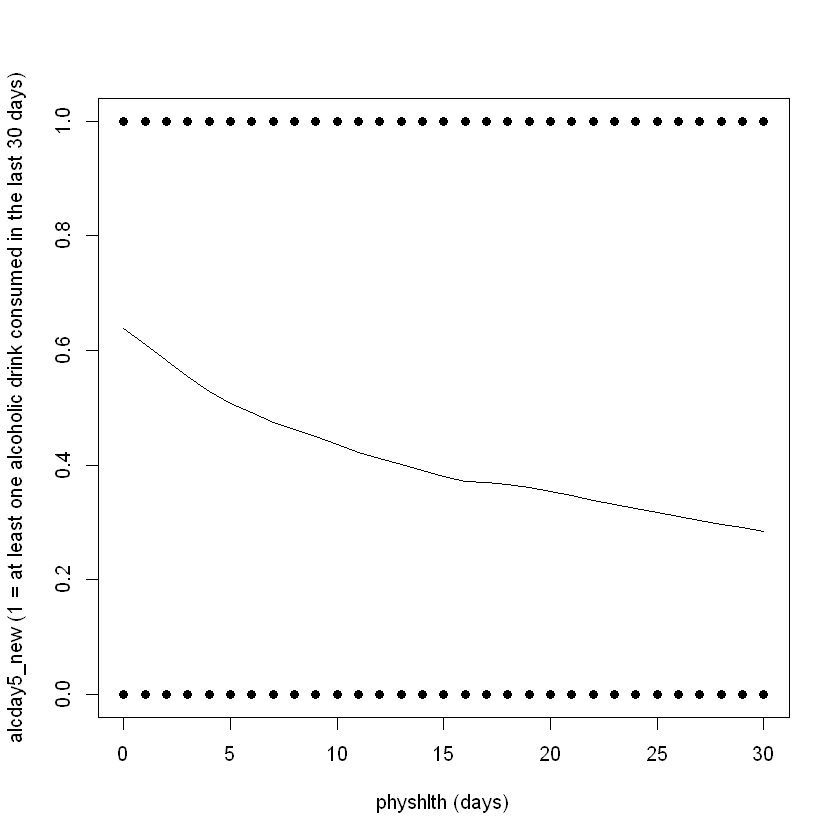

In [ ]:
plot(alcday5_new ~ physhlth, data=mydata, pch=16, ylab = "alcday5_new (1 = at least one alcoholic drink consumed in the last 30 days)", xlab = "physhlth (days)")
lines(lowess(mydata$physhlth, mydata$alcday5_new))

1. My prediction is that the explanatory variable (physhlth) has a negative relationship with the response variable (alcday5_new), since people with bad physical health may be more sensitive to possible negative consequences caused by alcohol.
2. There is a negative relationship between the variable physhlth and alcday5_new, indicating people with bad physical health drink alcoholic beverage less frequently.

### 2. Mental health

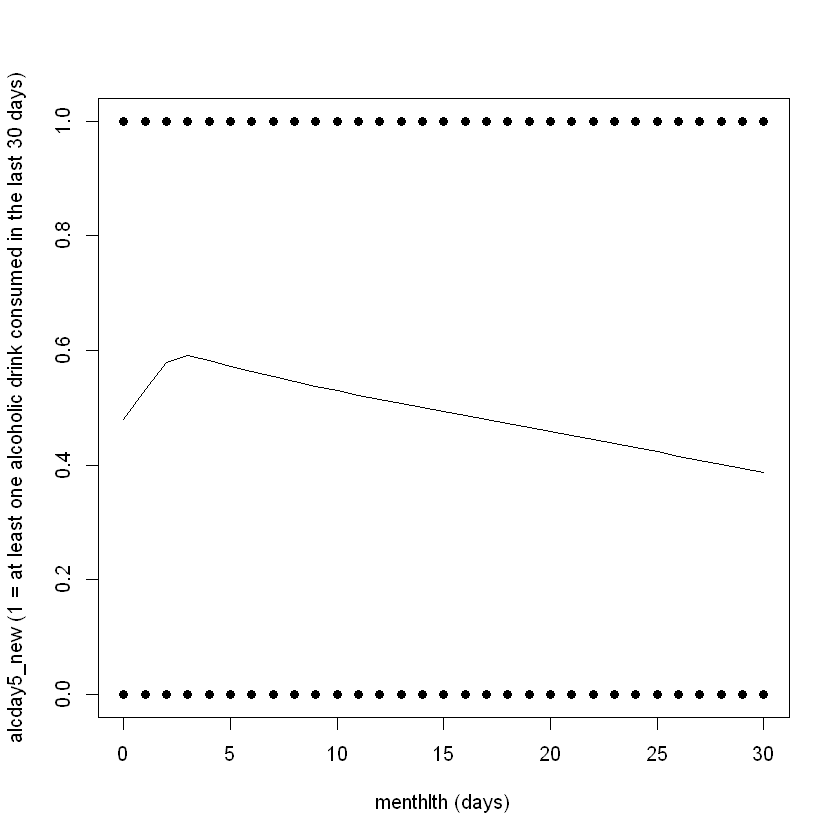

In [ ]:
plot(alcday5_new ~ menthlth, data=mydata, pch=16, ylab = "alcday5_new (1 = at least one alcoholic drink consumed in the last 30 days)", xlab = "menthlth (days)")
lines(lowess(mydata$menthlth, mydata$alcday5_new))

1. My prediction is that the explanatory variable (menthlth) has a negative relationship with the response variable (alcday5_new), since people with bad menthlth health may be more sensitive to possible negative consequences caused by alcohol.
2. There is a overall negative relationship between the variable menthlth and alcday5_new, indicating people with bad mental health drink alcoholic beverage less. However, there is a slight increase between 0 and 4 (menthlth).

### 3. Poor health

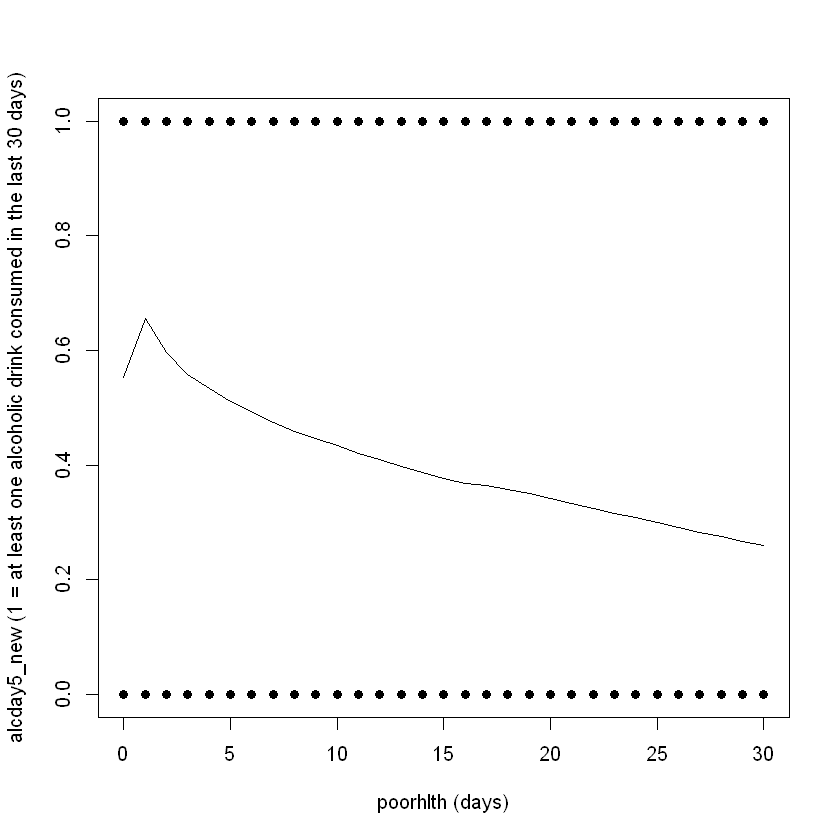

In [ ]:
plot(alcday5_new ~ poorhlth, data=mydata, pch=16, ylab = "alcday5_new (1 = at least one alcoholic drink consumed in the last 30 days)", xlab = "poorhlth (days)")
lines(lowess(mydata$poorhlth, mydata$alcday5_new))

1. My prediction is that the explanatory variable (poorhlth) has a negative relationship with the response variable (alcday5_new), since people with bad health may be more sensitive to possible negative consequences caused by alcohol.
2. There is a overall negative relationship between the variable poorhlth and alcday5_new, indicating people with bad health drink alcoholic beverage less. However, there is a slight increase between 0 and 1 (poorhlth).

### 4. Average amount of sleep

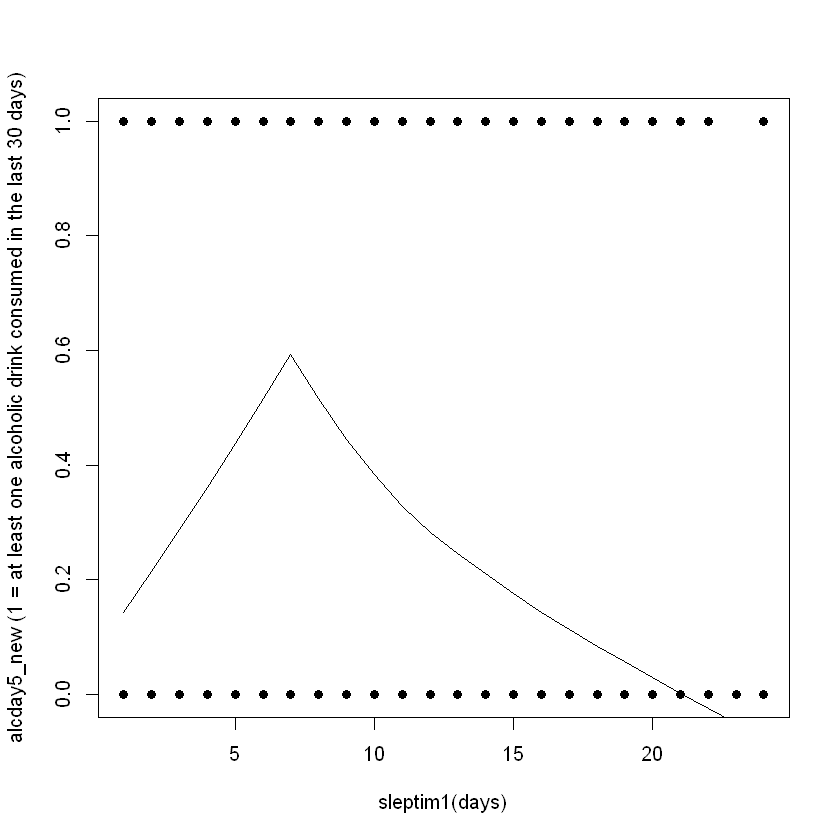

In [ ]:
plot(alcday5_new ~ sleptim1, data=mydata, pch=16,  ylab = "alcday5_new (1 = at least one alcoholic drink consumed in the last 30 days)", xlab = "sleptim1(days)")
lines(lowess(mydata$sleptim1, mydata$alcday5_new))

1. My prediction is that the explanatory variable (sleptim1) has a negative relationship with the response variable (alcday5_new), since people with less sleep time may be more likely to engage in behaviors that are associated with increased alcohol consumption, such as socializing late at night, attending parties or events, and so on.
2. From the plot, the value of alcday5_new rises and then falls as the variable sleptim1 increases, with a peak value shown when the sleptim7 equals 7.

### 5. Marital status

In [ ]:
mydata %>%
  group_by(marital) %>%
  summarize(prop = mean(alcday5_new))

marital,prop
<fct>,<dbl>
Married,0.5372288
Divorced,0.4690604
Widowed,0.3379322
Separated,0.4505887
Never married,0.5599670
A member of an unmarried couple,0.6415035


In [ ]:
glm.marital <- glm(alcday5_new ~ as.factor(marital), data=mydata, family="binomial"(link="logit"))
summary(glm.marital)


Call:
glm(formula = alcday5_new ~ as.factor(marital), family = binomial(link = "logit"), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4324  -1.2414   0.9423   1.1147   1.4730  

Coefficients:
                                                   Estimate Std. Error z value
(Intercept)                                        0.149191   0.006453  23.119
as.factor(marital)Divorced                        -0.273108   0.012865 -21.229
as.factor(marital)Widowed                         -0.821714   0.015388 -53.400
as.factor(marital)Separated                       -0.347484   0.027608 -12.586
as.factor(marital)Never married                    0.091837   0.012864   7.139
as.factor(marital)A member of an unmarried couple  0.432705   0.026882  16.096
                                                  Pr(>|z|)    
(Intercept)                                        < 2e-16 ***
as.factor(marital)Divorced                         < 2e-16 ***
as.factor(marital)W

In [ ]:
chisq.test(table(mydata$marital, mydata$alcday5_new))


	Pearson's Chi-squared test

data:  table(mydata$marital, mydata$alcday5_new)
X-squared = 4060.3, df = 5, p-value < 2.2e-16


1. Prediction: Marital status would be associated with alcohol consumption, with married individuals may consume less alcohol than unmarried individuals, since marriage often comes with greater social and family responsibilities.
2. The model indicates that marital status is significantly associated with alcday5_new. The coefficients for the different levels of marital status represent the difference in the log odds of alcday5_new between that level and the reference level "Married". For example, holding all other predictor variables constant, the log odds of alcday5_new for an individual who is divorced is 0.273108 lower than for an individual who is married.
3. The Pearson's Chi-squared test statistic is 4060.3 with 5 degrees of freedom. The p-value is less than 2.2e-16, which means that there is strong evidence against the null hypothesis of no association between the two variables.

### 6. Education

In [ ]:
mydata %>%
  group_by(educa) %>%
  summarize(prop = mean(alcday5_new))

educa,prop
<fct>,<dbl>
Never attended school or only kindergarten,0.2527473
Grades 1 through 8 (Elementary),0.2296925
Grades 9 though 11 (Some high school),0.3067627
Grade 12 or GED (High school graduate),0.4131674
College 1 year to 3 years (Some college or technical school),0.5065827
College 4 years or more (College graduate),0.6376271


In [ ]:
glm.educa <- glm(alcday5_new ~ as.factor(educa), data=mydata, family="binomial"(link="logit"))
summary(glm.educa)


Call:
glm(formula = alcday5_new ~ as.factor(educa), family = binomial(link = "logit"), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4248  -1.1886   0.9487   1.1663   1.7152  

Coefficients:
                                                                             Estimate
(Intercept)                                                                   -1.0840
as.factor(educa)Grades 1 through 8 (Elementary)                               -0.1260
as.factor(educa)Grades 9 though 11 (Some high school)                          0.2687
as.factor(educa)Grade 12 or GED (High school graduate)                         0.7331
as.factor(educa)College 1 year to 3 years (Some college or technical school)   1.1103
as.factor(educa)College 4 years or more (College graduate)                     1.6491
                                                                             Std. Error
(Intercept)                                                              

In [ ]:
chisq.test(table(mydata$educa, mydata$alcday5_new))


	Pearson's Chi-squared test

data:  table(mydata$educa, mydata$alcday5_new)
X-squared = 9957.6, df = 5, p-value < 2.2e-16


1. Prediction: People with higher education drink more alcohol than people with lower education because research shows that higher educational attainment is associated with increased odds of daily alcohol consumption and problem drinking[1].
2. The model indicates that education is significantly associated with alcday5_new for most levels. The coefficients for the different levels of education represent the difference in the log odds of drinking alcohol between that level and the reference level "Never attended school or only kindergarten". For example, holding all other predictor variables constant, the log odds of alcday5_new for an individual who had joined elementary school is 0.1260 less than for an individual who had never ever attended school or only kindergarten.
3. The Pearson's Chi-squared test statistic is 9957.6 with 5 degrees of freedom. The p-value is less than 2.2e-16, which means that there is strong evidence against the null hypothesis of no association between the two variables..

References: [1] Huerta, M. C., & Borgonovi, F. (2010). Education, alcohol use and abuse among young adults in Britain. Social Science & Medicine, 71(1), 143-151. https://doi.org/10.1016/j.socscimed.2010.03.022

### 7. Income

In [ ]:
mydata %>%
  group_by(income2) %>%
  summarize(prop = mean(alcday5_new))

income2,prop
<fct>,<dbl>
"Less than $10,000",0.3191489
"Less than $15,000",0.3081613
"Less than $20,000",0.3552960
"Less than $25,000",0.4047619
"Less than $35,000",0.4543697
"Less than $50,000",0.5238506
"Less than $75,000",0.5887343
"$75,000 or more",0.7013198


In [ ]:
glm.income2 <- glm(alcday5_new ~ as.factor(income2), data=mydata, family="binomial"(link="logit"))
summary(glm.income2)


Call:
glm(formula = alcday5_new ~ as.factor(income2), family = binomial(link = "logit"), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5546  -1.1007   0.8424   1.1371   1.5344  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -0.75769    0.01755 -43.179  < 2e-16 ***
as.factor(income2)Less than $15,000 -0.05104    0.02481  -2.058   0.0396 *  
as.factor(income2)Less than $20,000  0.16185    0.02335   6.932 4.14e-12 ***
as.factor(income2)Less than $25,000  0.37202    0.02250  16.533  < 2e-16 ***
as.factor(income2)Less than $35,000  0.57466    0.02203  26.090  < 2e-16 ***
as.factor(income2)Less than $50,000  0.85316    0.02126  40.133  < 2e-16 ***
as.factor(income2)Less than $75,000  1.11642    0.02121  52.642  < 2e-16 ***
as.factor(income2)$75,000 or more    1.61128    0.02021  79.715  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [ ]:
chisq.test(table(mydata$income2, mydata$alcday5_new))


	Pearson's Chi-squared test

data:  table(mydata$income2, mydata$alcday5_new)
X-squared = 15321, df = 7, p-value < 2.2e-16


1. Prediction: People with higher income drink more alcohol than people with lower income, since epidemiological evidence indicates a positive relationship between income and the prevalence of alcohol abuse in the general population[1].
2. The model indicates that income is significantly associated with alcday5_new (p-value < 0.05). The estimated coefficients for the other income levels represent the change in the log odds of drinking alcohol compared to the reference group "Less than $10,000". For example, holding all other predictor variables constant, the log odds of alcday5_new for an individual who earn less than 15,000 is 0.05104 less than for an individual who earn less than 10,000.
3. The Pearson's Chi-squared test statistic is 15321 with 7 degrees of freedom. The p-value is less than 2.2e-16, which means that there is strong evidence against the null hypothesis of no association between the two variables.

References: [1] Keyes, K. M., & Hasin, D. S. (2008). Socio-economic status and problem alcohol use: The positive relationship between income and the DSM-IV alcohol abuse diagnosis. Addiction (Abingdon, England), 103(7), 1120-1130. https://doi.org/10.1111/j.1360-0443.2008.02218.x

### 8. Sex/gender

In [ ]:
mydata %>%
  group_by(sex) %>%
  summarize(prop = mean(alcday5_new))

sex,prop
<fct>,<dbl>
Male,0.5838062
Female,0.4612602


In [ ]:
glm.sex <- glm(alcday5_new ~ as.factor(sex), data=mydata, family="binomial"(link="logit"))
summary(glm.sex)


Call:
glm(formula = alcday5_new ~ as.factor(sex), family = binomial(link = "logit"), 
    data = mydata)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.324  -1.112   1.037   1.244   1.244  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.338418   0.007448   45.44   <2e-16 ***
as.factor(sex)Female -0.493688   0.009398  -52.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 272603  on 196672  degrees of freedom
Residual deviance: 269817  on 196671  degrees of freedom
AIC: 269821

Number of Fisher Scoring iterations: 4


In [ ]:
chisq.test(table(mydata$sex, mydata$alcday5_new))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(mydata$sex, mydata$alcday5_new)
X-squared = 2775.6, df = 1, p-value < 2.2e-16


1. Prediction: Females drink less alcohol than Males, which may be due both to the absence of risk factors for alcohol use and abuse in women and to women's sensitivity to the negative consequences they will suffer from alcohol consumption[1].
2. The model indicates that sex is significantly associated with alcday5_new (p-value < 0.001). The estimated coefficient for the female group is -0.49, which means that the log odds of drinking alcohol for females are 0.49 units lower than for males.
3. The Pearson's Chi-squared test statistic is 2775.6 with 1 degree of freedom. The p-value is less than 2.2e-16, which means that there is strong evidence against the null hypothesis of no association between the two variables.

References:
[1] Nolen-Hoeksema, S. (2004). Gender differences in risk factors and consequences for alcohol use and problems. Clinical Psychology Review, 24(8), 981-1010. https://doi.org/10.1016/j.cpr.2004.08.003

<div class="alert alert-block alert-success">
<a id="Logistic"></a>

# Logistic Regression Model

Build a logistic regression model using **at most 4 explanatory variables (where at least one is a categorical variable)**. You can try alternate models and compare models using AIC. Remember to include interactions when appropriate. Show the results below for your final model. Include any other models you tried in **Appendix A**.
    
</div>    

### Fit your final model (1 mark for this model being appropriate for the data)
Include a brief description of why this model is appropriate for the data.

In [ ]:
# Fit your final model here.
# Use summary to get model co-efficients and other useful output.
glm.final <- glm(alcday5_new ~  poorhlth + as.factor(marital) + as.factor(income2) + as.factor(educa), data=mydata, family="binomial"(link="logit"))
summary(glm.final)


Call:
glm(formula = alcday5_new ~ poorhlth + as.factor(marital) + as.factor(income2) + 
    as.factor(educa), family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9588  -1.0757   0.6385   1.0556   2.2033  

Coefficients:
                                                                              Estimate
(Intercept)                                                                  -1.505233
poorhlth                                                                     -0.024072
as.factor(marital)Divorced                                                    0.271188
as.factor(marital)Widowed                                                    -0.228545
as.factor(marital)Separated                                                   0.379388
as.factor(marital)Never married                                               0.525184
as.factor(marital)A member of an unmarried couple                             0.798209
as.factor(inco

### Write the equation of your model, replacing the co-efficients with the numbers from the output of the summary command. Show the link function and describe how any categorical variables are encoded. (1.5 marks)

logit(alcday5_new) = -1.505233 - 0.024072 * poorhlth + 0.271188 * marital(Divorced) - 0.228545 * marital(Widowed) + 0.379388 * marital(Separated) + 0.525184 * marital(Never married) + 0.798209 * marital(A member of an unmarried couple) - 0.021533 * income2(Less than $15,000) + 0.154121 * income2(Less than $20,000) + 0.332930 * income2(Less than $25,000) + 0.485644 * income2(Less than $35,000) + 0.706397 * income2(Less than $50,000) + 0.921619 * income2(Less than $75,000) + 1.374559 * income2($75,000 or more) + 0.142622 * educa(Grades 1 through 8 (Elementary)) + 0.413006 * educa(Grades 9 though 11 (Some high school)) + 0.657127 * educa(Grade 12 or GED (High school graduate)) + 0.866436 * educa(College 1 year to 3 years (Some college or technical school)) + 1.092175 * educa(College 4 years or more (College graduate))

### Create plots to visualize the model fit. (2.5 marks)

In [ ]:
# holding educa level at median, marital level at median, color by income2
med_educa <- levels(mydata$educa)[ceiling(length(levels(mydata$educa))/2)]
med_marital <- levels(mydata$marital)[ceiling(length(levels(mydata$marital))/2)]

new_data_income2 <- expand.grid(educa = med_educa,
                              marital = med_marital,
                              poorhlth = seq(from = min(mydata$ poorhlth),
                                             to = max(mydata$poorhlth),
                                             length.out = 100),
                              income2 = levels(mydata$income2))

new_data_income2$predicted <- predict(glm.final, newdata = new_data_income2, type = "response")
# new_data_income2
#levels(mydata$income2)

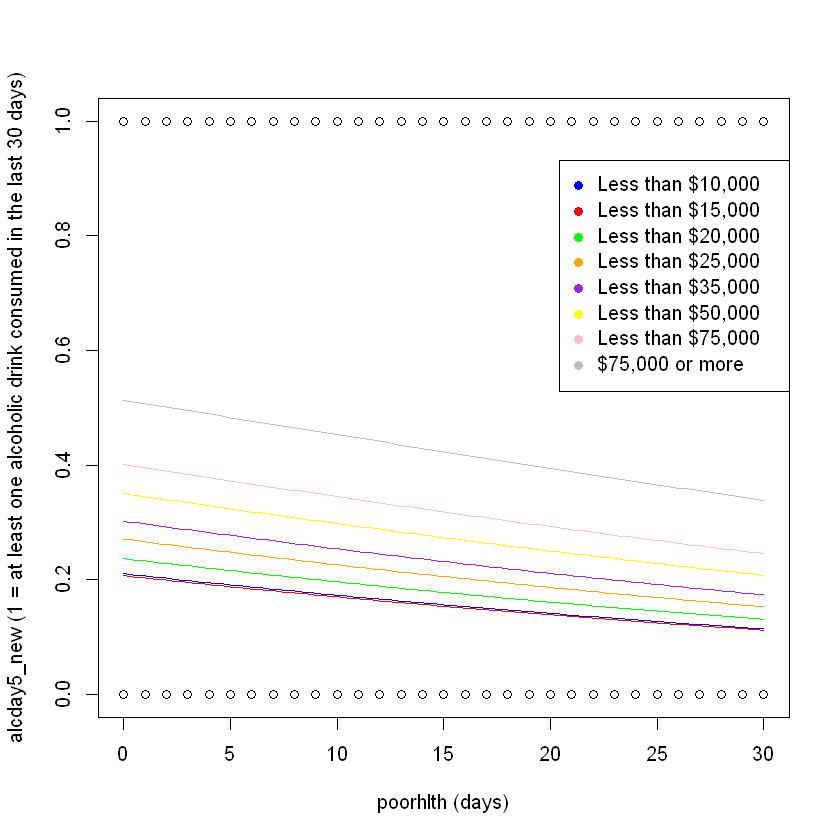

In [ ]:
plot(alcday5_new ~ poorhlth, data=mydata, ylab = "alcday5_new (1 = at least one alcoholic drink consumed in the last 30 days)", xlab = "poorhlth (days)")

new_data_10000 <- subset(new_data_income2, new_data_income2$income2 =="Less than $10,000")
new_data_15000 <- subset(new_data_income2, new_data_income2$income2 =="Less than $15,000")
new_data_20000 <- subset(new_data_income2, new_data_income2$income2 =="Less than $20,000")
new_data_25000 <- subset(new_data_income2, new_data_income2$income2 =="Less than $25,000")
new_data_35000 <- subset(new_data_income2, new_data_income2$income2 =="Less than $35,000")
new_data_50000 <- subset(new_data_income2, new_data_income2$income2 =="Less than $50,000")
new_data_75000 <- subset(new_data_income2, new_data_income2$income2 =="Less than $75,000")
new_data_more <- subset(new_data_income2, new_data_income2$income2 =="$75,000 or more")


lines(new_data_10000$poorhlth, new_data_10000$predicted, lty=1, col="blue")
lines(new_data_15000$poorhlth, new_data_15000$predicted, lty=1, col="red")
lines(new_data_20000$poorhlth, new_data_20000$predicted, lty=1, col="green")
lines(new_data_25000$poorhlth, new_data_25000$predicted, lty=1, col="orange")
lines(new_data_35000$poorhlth, new_data_35000$predicted, lty=1, col="purple")
lines(new_data_50000$poorhlth, new_data_50000$predicted, lty=1, col="yellow")
lines(new_data_75000$poorhlth, new_data_75000$predicted, lty=1, col="pink")
lines(new_data_more$poorhlth, new_data_more$predicted, lty=1, col="gray")

legend(legend=c("Less than $10,000","Less than $15,000", "Less than $20,000", "Less than $25,000", "Less than $35,000", "Less than $50,000", "Less than $75,000", "$75,000 or more"),
       col=c("blue", "red", "green", "orange", "purple","yellow", "pink","gray"), pch=16, "topright", inset = c(0, 0.1))

In [ ]:
# holding educa level at median, income2 level at median, color by marital
med_income2<- levels(mydata$income2)[ceiling(length(levels(mydata$income2))/2)]

new_data_marital <- expand.grid(educa = med_educa,
                              income2 = med_income2,
                              poorhlth = seq(from = min(mydata$ poorhlth),
                                             to = max(mydata$poorhlth),
                                             length.out = 100),
                              marital = levels(mydata$marital))

new_data_marital$predicted <- predict(glm.final, newdata = new_data_marital, type = "response")
# new_data_marital
# levels(mydata$marital)

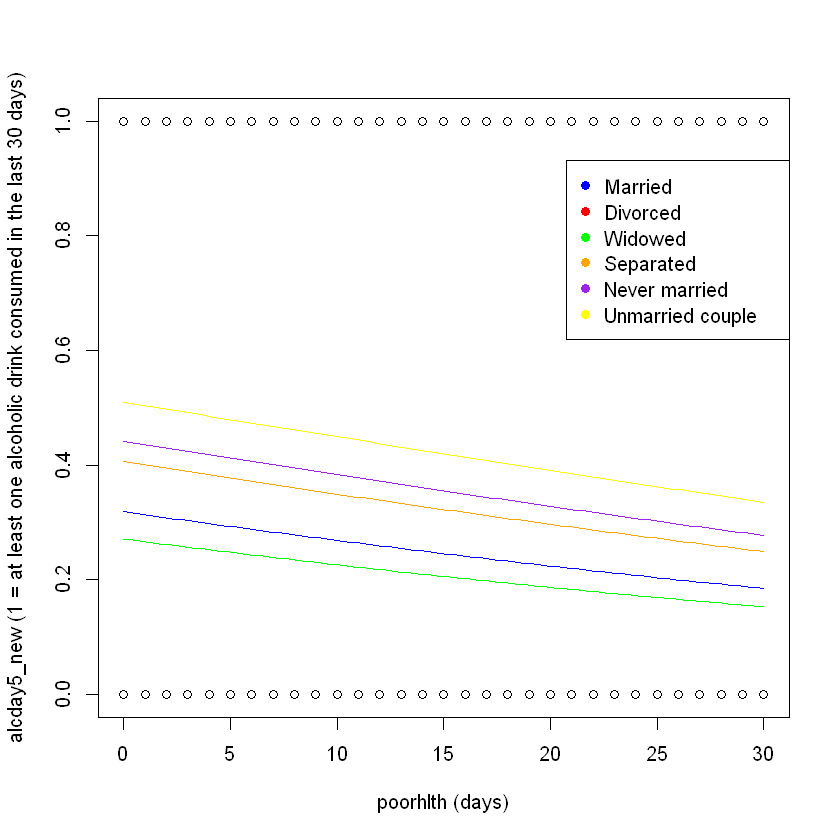

In [ ]:
plot(alcday5_new ~ poorhlth, data=mydata, ylab = "alcday5_new (1 = at least one alcoholic drink consumed in the last 30 days)", xlab = "poorhlth (days)")

new_data_married <- subset(new_data_marital, new_data_marital$marital =="Married")
new_data_divorced <- subset(new_data_marital, new_data_marital$marital =="Divorsed")
new_data_widowed <- subset(new_data_marital, new_data_marital$marital =="Widowed")
new_data_separated <- subset(new_data_marital, new_data_marital$marital =="Separated")
new_data_never <- subset(new_data_marital, new_data_marital$marital =="Never married")
new_data_couple <- subset(new_data_marital, new_data_marital$marital =="A member of an unmarried couple")

lines(new_data_married$poorhlth, new_data_married$predicted, lty=1, col="blue")
lines(new_data_divorced$poorhlth, new_data_divorced$predicted, lty=1, col="red")
lines(new_data_widowed$poorhlth, new_data_widowed$predicted, lty=1, col="green")
lines(new_data_separated$poorhlth, new_data_separated$predicted, lty=1, col="orange")
lines(new_data_never$poorhlth, new_data_never$predicted, lty=1, col="purple")
lines(new_data_couple$poorhlth, new_data_couple$predicted, lty=1, col="yellow")

legend(legend=c("Married", "Divorced", "Widowed", "Separated","Never married","Unmarried couple"),
       col=c("blue", "red", "green", "orange", "purple","yellow"), pch=16, "topright", inset = c(0, 0.1))

In [ ]:
# holding marital level at median, income2 level at median, color by educa
new_data_educa <- expand.grid(marital = med_marital,
                              income2 = med_income2,
                              poorhlth = seq(from = min(mydata$poorhlth),
                                             to = max(mydata$poorhlth),
                                             length.out = 100),
                              educa = levels(mydata$educa))

new_data_educa$predicted <- predict(glm.final, newdata = new_data_educa, type = "response")
# new_data_educa
# levels(mydata$educa)

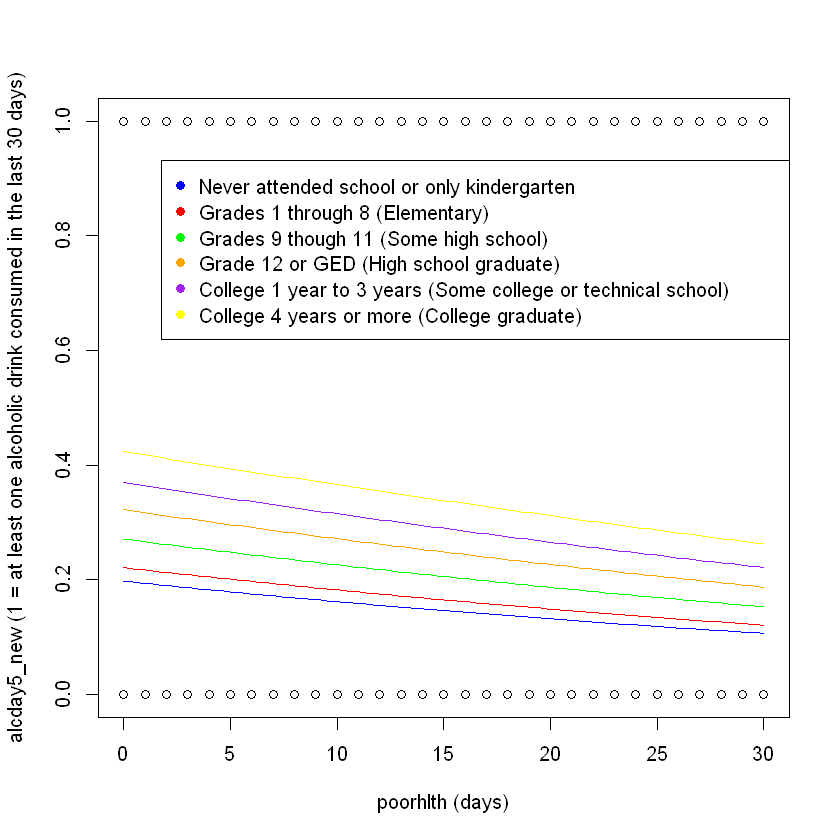

In [ ]:
plot(alcday5_new ~ poorhlth, data=mydata, ylab = "alcday5_new (1 = at least one alcoholic drink consumed in the last 30 days)", xlab = "poorhlth (days)")

new_data_kindergarten <- subset(new_data_educa, new_data_educa$educa =="Never attended school or only kindergarten")
new_data_Elementary <- subset(new_data_educa, new_data_educa$educa =="Grades 1 through 8 (Elementary)")
new_data_highschool1 <- subset(new_data_educa, new_data_educa$educa =="Grades 9 though 11 (Some high school)")
new_data_highschool2 <- subset(new_data_educa, new_data_educa$educa=="Grade 12 or GED (High school graduate)")
new_data_college <- subset(new_data_educa, new_data_educa$educa =="College 1 year to 3 years (Some college or technical school)")
new_data_college2 <- subset(new_data_educa, new_data_educa$educa =="College 4 years or more (College graduate)")

lines(new_data_kindergarten$poorhlth, new_data_kindergarten$predicted, lty=1, col="blue")
lines(new_data_Elementary$poorhlth, new_data_Elementary$predicted, lty=1, col="red")
lines(new_data_highschool1 $poorhlth, new_data_highschool1$predicted, lty=1, col="green")
lines(new_data_highschool2$poorhlth, new_data_highschool2$predicted, lty=1, col="orange")
lines(new_data_college$poorhlth, new_data_college$predicted, lty=1, col="purple")
lines(new_data_college2$poorhlth, new_data_college2$predicted, lty=1, col="yellow")

legend(legend=c('Never attended school or only kindergarten','Grades 1 through 8 (Elementary)','Grades 9 though 11 (Some high school)','Grade 12 or GED (High school graduate)','College 1 year to 3 years (Some college or technical school)','College 4 years or more (College graduate)'),
       col=c("blue", "red", "green", "orange", "purple","yellow"), pch=16, "topright", inset = c(0, 0.1))

### What are the main results of your model? (2 marks)

1. The likelihood of an individual having consumed at least one alcoholic drink in the last 30 days decreases as the number of days with poor physical or mental health increases.
2. Holding educa level, income2 level constant, unmarried couple have the highest likelihood of having consumed at least one alcoholic drink in the last 30 days, the widowed group has the lowest likelihood.
3. Holding marital level, income2 level constant, It shows people with higher education have higher likelihood of having consumed at least one alcoholic drink in the last 30 days.
4. Holding marital level, educa level constant, it shows people with higher income have higher likelihood of having consumed at least one alcoholic drink in the last 30 days.

---
## Do you have any concerns about the explanatory variables being related to each other? (0.75 marks)

Show plots and/or do analyses to support your conclusions. If there are associations between explanatory variables, what effect could this have on your model?

In [ ]:
library(car)
vif(glm.final)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




,GVIF,Df,GVIF^(1/(2*Df))
poorhlth,1.055079,1,1.027171
as.factor(marital),1.316475,5,1.027877
as.factor(income2),1.615643,7,1.034860
as.factor(educa),1.246639,5,1.022290


Based on the VIF output, there is some evidence of multicollinearity. The GVIF values are all greater than 1, which suggests that there is some degree of multicollinearity present. In general, GVIF values greater than 5 or 10 are cause for concern. However, the degree of multicollinearity in this model is not severe, and it is unlikely to cause significant issues. The GVIF values are all close to 1, which suggests that the degree of multicollinearity is minimal. <br>
Overall, while there is some degree of multicollinearity in the model, it is unlikely to cause significant issues.

<div class="alert alert-block alert-info">
    
## Classification table (0.75 marks)

Create a classification table (use potential cut-off values that you think make sense for the data). (0.5 marks)  
What cut-off value would you use to maximize the accuracy (% of correct predictions)? (0.25 marks)
<div>

In [ ]:
# Avoid viewing numbers using scientific notation
options(scipen = 99)

# Create an empty dataframe that you will fill
df <- data.frame(matrix(ncol = 9, nrow = 1001))
colnames(df) <- c("true.positive", "true.negative", "false.positive", "false.negative", "correct.percent", "sensitivity", "specificity", "false.pos.rate", "false.neg.rate")

prob.level <- seq(0, 1, length.out=1001) # create a vector with different possible probabilities
# prob.level

class.table.data <- cbind(prob.level, df) # combine your vector of probabilities and your empty dataframe
head(class.table.data)

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.000,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,0.001,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,0.002,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,0.003,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,0.004,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,0.005,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
# fill empty cells in your dataframe with 0
class.table.data$true.positive <- rep(c(0), c(1001))
class.table.data$true.negative <- rep(c(0), c(1001))
class.table.data$false.positive <- rep(c(0), c(1001))
class.table.data$false.negative <- rep(c(0), c(1001))
head(class.table.data)

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.000,0,0,0,0,NA,NA,NA,NA,NA
2,0.001,0,0,0,0,NA,NA,NA,NA,NA
3,0.002,0,0,0,0,NA,NA,NA,NA,NA
4,0.003,0,0,0,0,NA,NA,NA,NA,NA
5,0.004,0,0,0,0,NA,NA,NA,NA,NA
6,0.005,0,0,0,0,NA,NA,NA,NA,NA


In [ ]:
# This loop will try out the different probability cut-off values and fill in how many true positive/negatives and false positive/negatives you have based on your data.
for (i in 1:1001) {
  class.table <- table(mydata$alcday5_new, fitted(glm.final) > class.table.data$prob.level[i])

  col.true.num <- grep("TRUE", colnames(class.table))
  col.false.num <- grep("FALSE", colnames(class.table))

  if (length(col.true.num) > 0) {
    class.table.data$false.positive [i] <- class.table[1, col.true.num]
    class.table.data$true.positive [i] <- class.table[2, col.true.num] }

  if (length(col.false.num) > 0) {
    class.table.data$true.negative [i] <- class.table[1, col.false.num]
    class.table.data$false.negative [i] <- class.table[2, col.false.num] }  }

head(class.table.data)

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.000,99809,0,96864,0,NA,NA,NA,NA,NA
2,0.001,99809,0,96864,0,NA,NA,NA,NA,NA
3,0.002,99809,0,96864,0,NA,NA,NA,NA,NA
4,0.003,99809,0,96864,0,NA,NA,NA,NA,NA
5,0.004,99809,0,96864,0,NA,NA,NA,NA,NA
6,0.005,99809,0,96864,0,NA,NA,NA,NA,NA


In [ ]:
# You will use this information to fill in the rest of your classification table.
class.table.data$correct.percent <- (class.table.data$true.positive + class.table.data$true.negative)/nrow(mydata)*100
class.table.data$sensitivity <- (class.table.data$true.positive)/sum(mydata$alcday5_new)*100
class.table.data$specificity <- (class.table.data$true.negative)/(nrow(mydata) - sum(mydata$alcday5_new))*100
class.table.data$false.neg.rate <- (class.table.data$false.negative)/sum(mydata$alcday5_new)*100
class.table.data$false.pos.rate <- (class.table.data$false.positive)/(nrow(mydata) - sum(mydata$alcday5_new))*100
class.table.data

# write.csv(class.table.data,"classification_table.csv")

prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.000,99809,0,96864,0,50.7487,100,0,100,0
0.001,99809,0,96864,0,50.7487,100,0,100,0
0.002,99809,0,96864,0,50.7487,100,0,100,0
0.003,99809,0,96864,0,50.7487,100,0,100,0
0.004,99809,0,96864,0,50.7487,100,0,100,0
0.005,99809,0,96864,0,50.7487,100,0,100,0
0.006,99809,0,96864,0,50.7487,100,0,100,0
0.007,99809,0,96864,0,50.7487,100,0,100,0
0.008,99809,0,96864,0,50.7487,100,0,100,0


<div class="alert alert-block alert-info">
    
## ROC curve + AUC (1 mark)

Create the ROC curve. (0.25 marks)  
Find the AUC (area under the curve) value. (0.25 marks)  
Interpret these results - what do they tell you about your model? (0.5 marks)
<div>

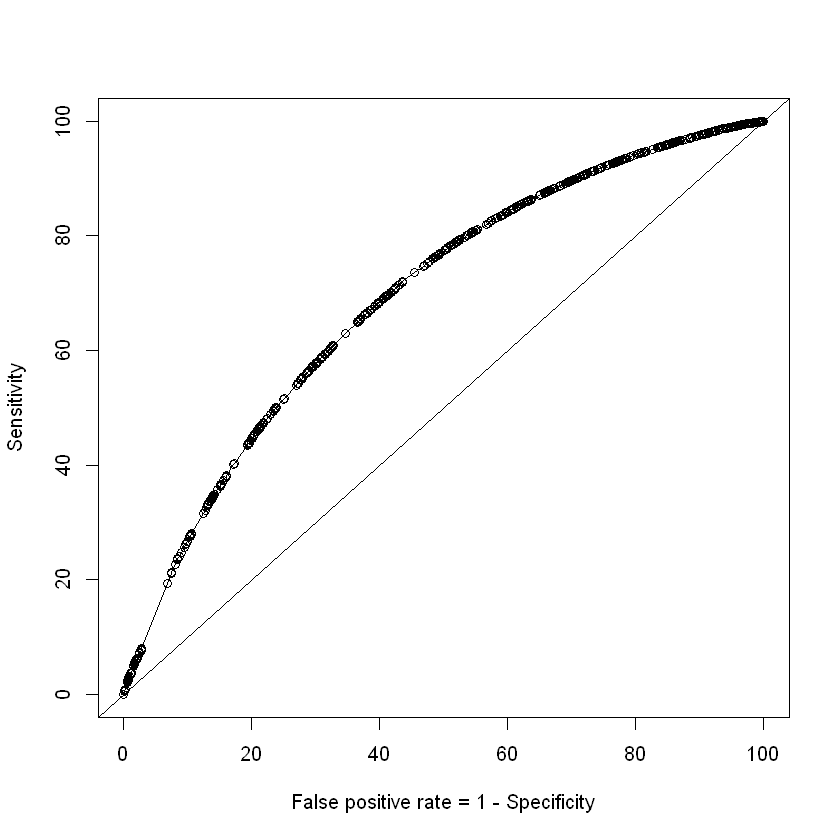

In [ ]:
# Create the ROC curve
plot(class.table.data$sensitivity ~ class.table.data$false.pos.rate, data=class.table.data, ylab = "Sensitivity", xlab = "False positive rate = 1 - Specificity")
lines(sensitivity ~ false.pos.rate, data=class.table.data)
abline(0, 1)

In [ ]:
# Find the AUC (area under the curve) value.
library(zoo)

x <- class.table.data$false.pos.rate/100
y <- class.table.data$sensitivity/100
id <- order(x)

AUC <- sum(diff(x[id])*rollmean(y[id],2)); AUC # average of left and right to create rectangle; then take sum of all the pieces

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




[1] 0.6933646

The AUC value of the model is 0.6524, indicating that the model's ability to distinguish between positive and negative classes is slightly better than random guessing, where an AUC of 0.5 indicates random guessing and an AUC of 1 indicates perfect prediction.
In other words, the model has some discriminatory power, but it is not particularly strong.

<div class="alert alert-block alert-danger">
<a id="Data_prep2"></a>

# Data preparation for Poisson regression (0.25 marks)
</div>

You will be creating a new dataset for the Poisson regression model. Remove all observations where individuals did not consume any alcohol in the past 30 days (encoded as 0 in the previous analysis). How many observations are in this new dataset?

In [ ]:
data_poisson <- subset(mydata, mydata$alcday5_new == 1)
nrow(data_poisson)

[1] 99809

<div class="alert alert-block alert-warning">
<a id="EDA2"></a>

# Exploring the response variable (2 marks)
    
The focus of this analysis is to examine variables associated with consuming more than the recommended maximum of alcohol. The focus is only on individuals who have consumed at least one alcohol drink in the past 30 days (this helps remove excess 0's). The variable `drnk3ge5` will be used as the response variable.  
<br>
Do you think that the response variable follows a Poisson distribution? Provide specific evidence for your conclusions.
</div>

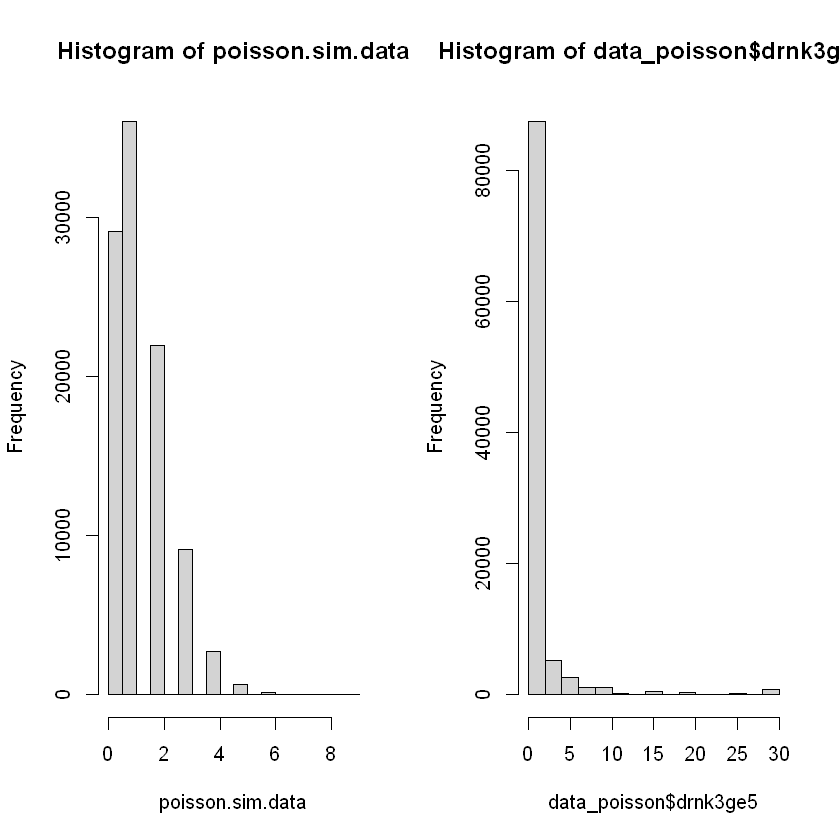

In [ ]:
#Compare the simulated histogram and the histogram for response variable
poisson.sim.data <- rpois(99809, 1.227625)
par(mfrow=c(1,2))
hist(poisson.sim.data)
hist(data_poisson$drnk3ge5)

The histograms are not similar, indicating that drnk3ge5 may not follow a poisson distribution

In [ ]:
#Check if mean and standard deviation are similar
mean(data_poisson$drnk3ge5)
sd(data_poisson$drnk3ge5)^2

[1] 1.227625

[1] 14.06049

For a Poisson Distribution, the mean and the variance are equal or very similar, but they are not in this case.

In [ ]:
#goodness-of-fit test method 2
table(data_poisson$drnk3ge5)
expected.freq <- vector("numeric")

for (i in 1:31) {
  expected.freq [i] <- exp(-mean(data_poisson$drnk3ge5))*mean(data_poisson$drnk3ge5)^(i-1)/factorial(i-1)*nrow(data_poisson)
}

frequency.table <- as.data.frame(table(data_poisson$drnk3ge5))

frequency.table$Var1 <- as.numeric(as.character(frequency.table$Var1))
freq.table <- cbind(frequency.table, expected.freq)

chi.squared.statistic <- sum((freq.table$Freq - freq.table$expected.freq)^2/freq.table$expected.freq)
chi.squared.statistic

1-pchisq(1.254155e+31, df=30)
qchisq(.95, df=30)

chisq.test(freq.table$Freq, p=freq.table$expected.freq/99809)
chisq.test(freq.table$Freq, p=freq.table$expected.freq/99809)$residuals


    0     1     2     3     4     5     6     7     8     9    10    11    12 
71635 10093  5819  2729  2533  1868   731   447   628    61   984    11   235 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   17    58   459    36    15    16     1   351    14     9    13    20   135 
   26    27    28    29    30 
    9    10    51    15   806 

[1] 12541546125901015734668442840888

[1] 0

[1] 43.77297

Warning message in chisq.test(freq.table$Freq, p = freq.table$expected.freq/99809):
"Chi-squared approximation may be incorrect"



	Chi-squared test for given probabilities

data:  freq.table$Freq
X-squared = 12541546125901015734668442840888, df = 30, p-value <
0.00000000000000022


Warning message in chisq.test(freq.table$Freq, p = freq.table$expected.freq/99809):
"Chi-squared approximation may be incorrect"


[1]              247.899911             -136.201408             -109.242959
 [4]              -66.219206               -4.455576               45.596300
 [7]               50.207213               85.590434              322.739986
[10]               84.675519             3931.074189              131.469154
[13]             8786.818559             2068.479257            23832.144374
[16]           659265.981363           186671.343343           289439.668421
[19]          1182197.966712           290679.366964        411816269.225305
[22]         67936199.260082        184881833.864322       1155915749.336610
[25]       7862952010.788569     239511616618.194183      73483388903.733032
[28]     382909136754.803955    9326358403143.146484   13332124564979.339844
[31] 3541367135718370.500000

Test statistic > critical value, p<0.05, reject the null hypothesis, drnk3ge5 does not poisson distribution.
Moreover, since we are using alpha = 0.05, we can use +/-1.96 as cut-offs, there are many standard residuals exceeds the cut-offs, indicate that the observed frequencies are significantly different from the expected frequencies at the 5% level.

<div class="alert alert-block alert-warning">
<a id="EDA2"></a>

# Predictions and Exploratory Data Analysis for Poisson Regression (8 marks; 1 mark per variable)

Complete the following for each potential explanatory variable:  
    
A) What is your prediction for the relationship between the explanatory variable and the response variable?  (0.25 marks)

B1) If quantitative, visualize the relationship using a scatterplot with a lowess line (0.25 marks). What relationship do you see on the plot?  (0.5 marks)

B2) If categorical, what is the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for EACH category level? (0.25 marks) Are there differences that indicate that this could be a good explanatory variable to use? (0.5 marks)
</div>

Since drinking can often related to self-paralysis and bad mood, we predict that drnk3ge5 might be positively related to pyhsical health, mental health, and poor health, and it is likely to negatively related to sleeptime. That means the worse a person's mental and physical health status is, the less sleep he/she might have, the more frequent he/she will drink.
Since married people tend to be more stable, we expected that married people will drink less than people in other martial levels. Generally speaking, the higher education level a person has, the higher income he/she would earn, the more successful(in general sense) he/she is, so we expect that the number of times drinking will decrease with increase in education level and income level. Finally, in terms of difference in gender, we expected that males might drink more frequently than females.

### 1. Physical health

In [ ]:
par(mfrow=c(1,1))
z1 <- glm(drnk3ge5 ~ physhlth, data=data_poisson, family="poisson"(link="log"))
summary(z1)


Call:
glm(formula = drnk3ge5 ~ physhlth, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6994  -1.5549  -1.5338  -0.1886  11.6912  

Coefficients:
             Estimate Std. Error z value            Pr(>|z|)    
(Intercept) 0.1623392  0.0034551   46.99 <0.0000000000000002 ***
physhlth    0.0068374  0.0002963   23.07 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 454219  on 99808  degrees of freedom
Residual deviance: 453705  on 99807  degrees of freedom
AIC: 534368

Number of Fisher Scoring iterations: 7


There is a slight positive relationship between physical health and drnk3ge5, where increase in one unit of physical health can increase the expected log of drnk3ge5 by 0.0068374.

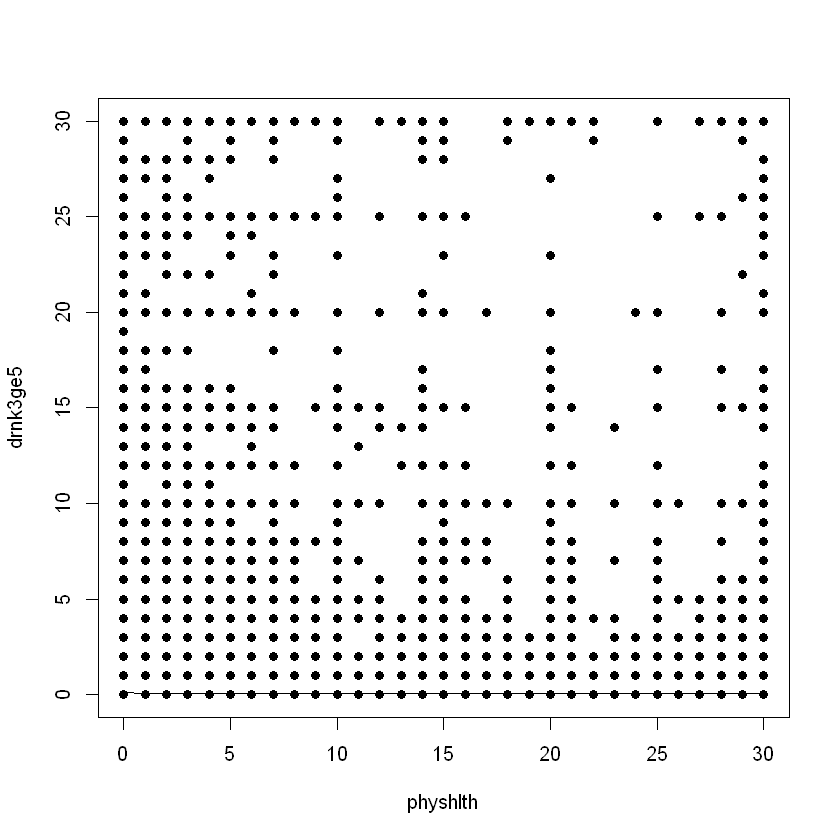

In [ ]:
plot(drnk3ge5 ~ physhlth, data=data_poisson, pch=16)
lines(lowess(data_poisson$physhlth, data_poisson$drnk3ge5))

### 2. Mental health

In [ ]:
z2 <- glm(drnk3ge5 ~ menthlth, data=data_poisson, family="poisson"(link="log"))
summary(z2)


Call:
glm(formula = drnk3ge5 ~ menthlth, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2016  -1.4886  -1.4016  -0.1992  12.1290  

Coefficients:
              Estimate Std. Error z value             Pr(>|z|)    
(Intercept) -0.0179421  0.0037027  -4.846           0.00000126 ***
menthlth     0.0301051  0.0002619 114.965 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 454219  on 99808  degrees of freedom
Residual deviance: 442512  on 99807  degrees of freedom
AIC: 523175

Number of Fisher Scoring iterations: 7


There is a slight positive relationship between mental health and drnk3ge5, where increase in one unit of mental health can increase the expected log of drnk3ge5 by 0.0301051.

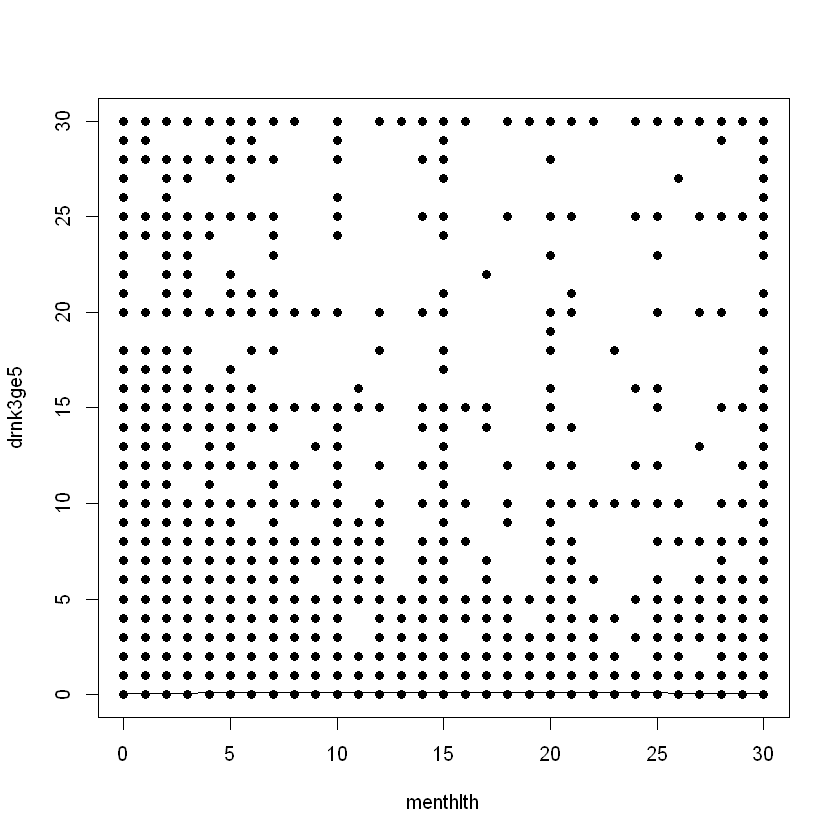

In [ ]:
plot(drnk3ge5 ~ menthlth, data=data_poisson, pch=16)
lines(lowess(data_poisson$menthlth, data_poisson$drnk3ge5))

### 3. Poor health

In [ ]:
z3 <- glm(drnk3ge5 ~ poorhlth, data=data_poisson, family="poisson"(link="log"))
summary(z3)


Call:
glm(formula = drnk3ge5 ~ poorhlth, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9588  -1.5246  -1.5115  -0.1542  11.7633  

Coefficients:
             Estimate Std. Error z value            Pr(>|z|)    
(Intercept) 0.1330116  0.0032454   40.98 <0.0000000000000002 ***
poorhlth    0.0172848  0.0003218   53.71 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 454219  on 99808  degrees of freedom
Residual deviance: 451614  on 99807  degrees of freedom
AIC: 532277

Number of Fisher Scoring iterations: 7


There is a slight positive relationship between poor health and drnk3ge5, where increase in one unit of poor health can increase the expected log of drnk3ge5 by 0.0172848.

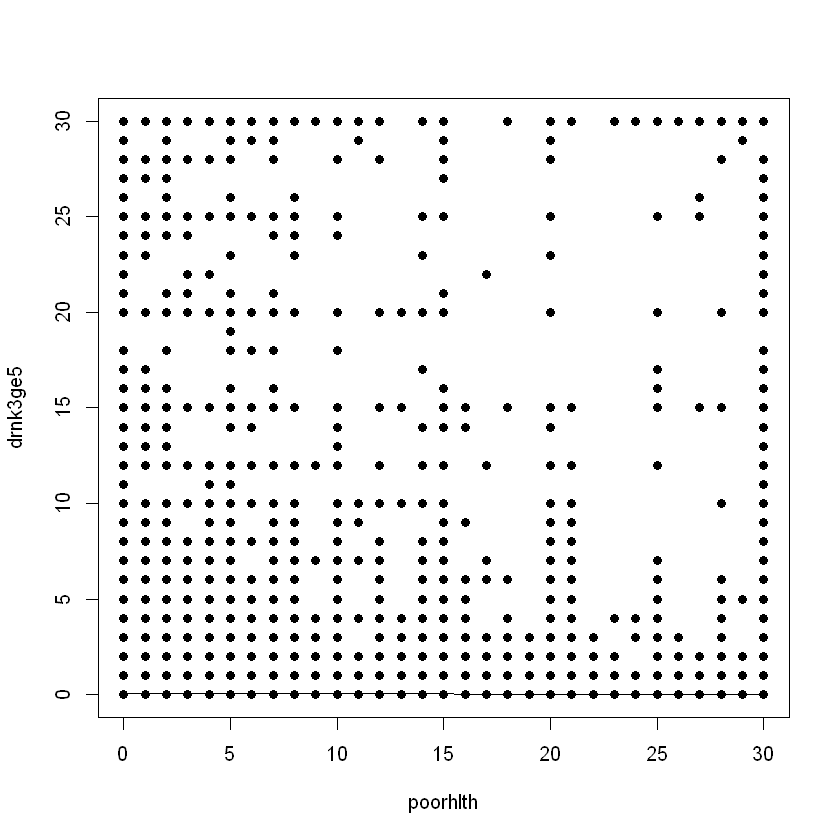

In [ ]:
plot(drnk3ge5 ~ poorhlth, data=data_poisson, pch=16)
lines(lowess(data_poisson$poorhlth, data_poisson$drnk3ge5))

### 4. Average amount of sleep

In [ ]:
z4 <- glm(drnk3ge5 ~ sleptim1, data=data_poisson, family="poisson"(link="log"))
summary(z4)


Call:
glm(formula = drnk3ge5 ~ sleptim1, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9195  -1.6138  -1.5056  -0.2761  13.6935  

Coefficients:
             Estimate Std. Error z value            Pr(>|z|)    
(Intercept)  0.680362   0.014474   47.00 <0.0000000000000002 ***
sleptim1    -0.069396   0.002092  -33.17 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 454219  on 99808  degrees of freedom
Residual deviance: 453107  on 99807  degrees of freedom
AIC: 533769

Number of Fisher Scoring iterations: 7


There is a slight negative relationship between sleep time and drnk3ge5, where increase in one unit of sleep time can decrease the expected log of drnk3ge5 by -0.069396.

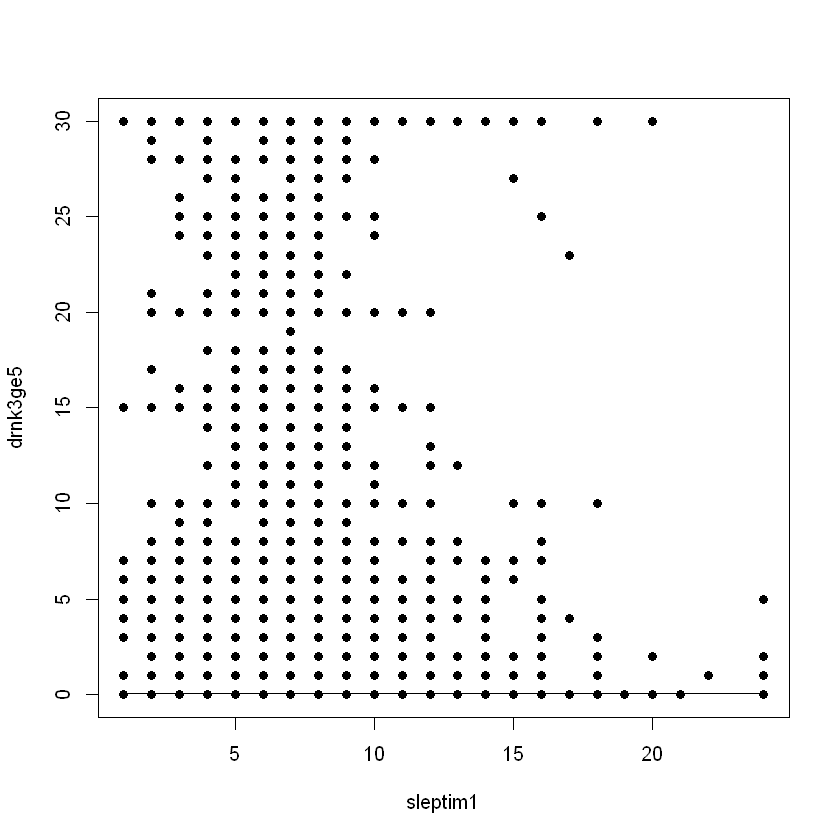

In [ ]:
plot(drnk3ge5 ~ sleptim1, data=data_poisson, pch=16)
lines(lowess(data_poisson$sleptim1, data_poisson$drnk3ge5))

### 5. Marital status

In [ ]:
data_poisson$marital <- factor(data_poisson$marital)
z5 <- glm(drnk3ge5 ~ marital, data=data_poisson, family="poisson"(link="log"))
summary(z5)


Call:
glm(formula = drnk3ge5 ~ marital, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9625  -1.7401  -1.3434  -0.5875  12.6732  

Coefficients:
                                        Estimate Std. Error z value
(Intercept)                            -0.102811   0.004621  -22.25
maritalDivorced                         0.517572   0.008049   64.30
maritalWidowed                         -0.146843   0.013682  -10.73
maritalSeparated                        0.640587   0.015892   40.31
maritalNever married                    0.758082   0.007047  107.58
maritalA member of an unmarried couple  0.637996   0.012819   49.77
                                                  Pr(>|z|)    
(Intercept)                            <0.0000000000000002 ***
maritalDivorced                        <0.0000000000000002 ***
maritalWidowed                         <0.0000000000000002 ***
maritalSeparated                       <0.00

summary(z5)
The model indicates that marital status is significantly associated with drnk3ge5. The coefficients for the different levels of marital status represent the difference in the expected log of drnk3ge5 between that level and the reference level "Married". For example, holding all other predictor variables constant, the expected log of drnk3ge5 for an individual who is divorced is 0.517572 higher than for an individual who is married.

In [ ]:
mean_by_marital <- aggregate(data_poisson$drnk3ge5, by = list(data_poisson$marital), FUN = mean)
colnames(mean_by_marital) <- c("marital", "mean_drnk3ge5")
mean_by_marital

marital,mean_drnk3ge5
<fct>,<dbl>
Married,0.9022971
Divorced,1.5140076
Widowed,0.7790698
Separated,1.7121932
Never married,1.9256635
A member of an unmarried couple,1.7077637


In [ ]:
chi_squared <- chisq.test(table(data_poisson$drnk3ge5, data_poisson$marital))
chi_squared

Warning message in chisq.test(table(data_poisson$drnk3ge5, data_poisson$marital)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(data_poisson$drnk3ge5, data_poisson$marital)
X-squared = 4688.2, df = 150, p-value < 0.00000000000000022


p-value is less than 0.05, we can reject the null hypothesis of independence, and conclude that there is a statistically significant association between drnk3ge5 and marital

### 6. Education

In [ ]:
data_poisson$educa <- factor(data_poisson$educa)
z6 <- glm(drnk3ge5 ~ educa, data=data_poisson, family="poisson"(link="log"))
summary(z6)


Call:
glm(formula = drnk3ge5 ~ educa, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.108  -1.617  -1.300  -0.281  12.486  

Coefficients:
                                                                  Estimate
(Intercept)                                                        0.41985
educaGrades 1 through 8 (Elementary)                               0.33114
educaGrades 9 though 11 (Some high school)                         0.37836
educaGrade 12 or GED (High school graduate)                        0.08911
educaCollege 1 year to 3 years (Some college or technical school) -0.15138
educaCollege 4 years or more (College graduate)                   -0.58866
                                                                  Std. Error
(Intercept)                                                          0.11952
educaGrades 1 through 8 (Elementary)                                 0.12133
educaGrades 9 though 11 (Som

The model indicates that education is significantly associated with drnk3ge5 for most levels. The coefficients for the different levels of education represent the difference in the expected log of drnk3ge5 between that level and the reference level "Never attended school or only kindergarten". For example, holding all other predictor variables constant, the expected log of drnk3ge5 for an individual who had joined elementary school is 0.33114 higher than for an individual who had never ever attended school or only kindergarten.

In [ ]:
mean_by_educa <- aggregate(data_poisson$drnk3ge5, by = list(data_poisson$educa), FUN = mean)
colnames(mean_by_educa) <- c("educa", "mean_drnk3ge5")
mean_by_educa

educa,mean_drnk3ge5
<fct>,<dbl>
Never attended school or only kindergarten,1.5217391
Grades 1 through 8 (Elementary),2.1191136
Grades 9 though 11 (Some high school),2.2215703
Grade 12 or GED (High school graduate),1.6635614
College 1 year to 3 years (Some college or technical school),1.3079658
College 4 years or more (College graduate),0.8446713


In [ ]:
chi_squared <- chisq.test(table(data_poisson$drnk3ge5, data_poisson$educa))
chi_squared

Warning message in chisq.test(table(data_poisson$drnk3ge5, data_poisson$educa)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(data_poisson$drnk3ge5, data_poisson$educa)
X-squared = 1578.4, df = 150, p-value < 0.00000000000000022


p-value is less than 0.05, we can reject the null hypothesis of independence, and conclude that there is a statistically significant association between drnk3ge5 and education.

### 7. Income

In [ ]:
data_poisson$income2 <- factor(data_poisson$income2)
z7 <- glm(drnk3ge5 ~ income2, data=data_poisson, family="poisson"(link="log"))
summary(z7)


Call:
glm(formula = drnk3ge5 ~ income2, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0583  -1.5665  -1.3769  -0.3099  12.2138  

Coefficients:
                          Estimate Std. Error z value            Pr(>|z|)    
(Intercept)               0.750585   0.009948   75.45 <0.0000000000000002 ***
income2Less than $15,000 -0.167513   0.014755  -11.35 <0.0000000000000002 ***
income2Less than $20,000 -0.299740   0.014013  -21.39 <0.0000000000000002 ***
income2Less than $25,000 -0.401070   0.013500  -29.71 <0.0000000000000002 ***
income2Less than $35,000 -0.455893   0.013076  -34.86 <0.0000000000000002 ***
income2Less than $50,000 -0.545989   0.012444  -43.88 <0.0000000000000002 ***
income2Less than $75,000 -0.678947   0.012381  -54.84 <0.0000000000000002 ***
income2$75,000 or more   -0.804056   0.011432  -70.34 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(D

The model indicates that income is significantly associated with drnk3ge5. The coefficients for the different levels of income represent the difference in the expected log of drnk3ge5 between that level and the reference level "Less than $10,000". For example, holding all other predictor variables constant, the expected log of drnk3ge5 for an individual who earn less than 15,000 is 0.167513 less than for an individual who earn less than 10,000.

In [ ]:
mean_by_income <- aggregate(data_poisson$drnk3ge5, by = list(data_poisson$income2), FUN = mean)
colnames(mean_by_income) <- c("income", "mean_drnk3ge5")
mean_by_income

income,mean_drnk3ge5
<fct>,<dbl>
"Less than $10,000",2.1182390
"Less than $15,000",1.7915337
"Less than $20,000",1.5696377
"Less than $25,000",1.4183794
"Less than $35,000",1.3427135
"Less than $50,000",1.2270296
"Less than $75,000",1.0742664
"$75,000 or more",0.9479333


In [ ]:
chi_squared <- chisq.test(table(data_poisson$drnk3ge5, data_poisson$income2))
chi_squared

Warning message in chisq.test(table(data_poisson$drnk3ge5, data_poisson$income2)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(data_poisson$drnk3ge5, data_poisson$income2)
X-squared = 1143.4, df = 210, p-value < 0.00000000000000022


p-value is less than 0.05, we can reject the null hypothesis of independence, and conclude that there is a statistically significant association between drnk3ge5 and income

### 8. Sex/gender

In [ ]:
data_poisson$sex <- factor(data_poisson$sex)
z8 <- glm(drnk3ge5 ~ sex, data=data_poisson, family="poisson"(link="log"))
summary(z8)


Call:
glm(formula = drnk3ge5 ~ sex, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8983  -1.8983  -1.2549  -0.6527  12.6486  

Coefficients:
             Estimate Std. Error z value            Pr(>|z|)    
(Intercept)  0.588805   0.003580   164.5 <0.0000000000000002 ***
sexFemale   -0.827795   0.005941  -139.3 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 454219  on 99808  degrees of freedom
Residual deviance: 433838  on 99807  degrees of freedom
AIC: 514500

Number of Fisher Scoring iterations: 7


The model indicates that sex is significantly associated with drnk3ge5. The coefficients for the different levels of sex represent the difference in the expected log of drnk3ge5 between that level and the reference level "Male". Specifically, holding all other predictor variables constant, the expected log of drnk3ge5 for a female is 0.827795 lower than for a male.

In [ ]:
mean_by_sex <- aggregate(data_poisson$drnk3ge5, by = list(data_poisson$sex), FUN = mean)
colnames(mean_by_sex) <- c("sex", "mean_drnk3ge5")
mean_by_sex

sex,mean_drnk3ge5
<fct>,<dbl>
Male,1.8018332
Female,0.7874223


In [ ]:
chi_squared <- chisq.test(table(data_poisson$drnk3ge5, data_poisson$sex))
chi_squared

Warning message in chisq.test(table(data_poisson$drnk3ge5, data_poisson$sex)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(data_poisson$drnk3ge5, data_poisson$sex)
X-squared = 2569.1, df = 30, p-value < 0.00000000000000022


p-value is less than 0.05, we can reject the null hypothesis of independence, and conclude that there is a statistically significant association between drnk3ge5 and sex

<div class="alert alert-block alert-success">
<a id="Poisson"></a>
    
# Poisson Regression model
    
Build a Poisson regression model using **at most 4 explanatory variables (where at least one is a categorical variable)**. You can try alternate models and compare models using AIC. Remember to include interactions when appropriate. Show the results below for your final model. Include any other models you tried in **Appendix B**.
    
</div>    

### Fit your final model (1 mark for this model being appropriate for the data)
Include a brief description of why this model is appropriate for the data.

In [ ]:
# Fit your final model here.
z16 <- glm(drnk3ge5 ~ income2 + menthlth*marital*sex, data=data_poisson, family="poisson"(link="log"))
# Use summary to get model co-efficients and other useful output.
summary(z16)


Call:
glm(formula = drnk3ge5 ~ income2 + menthlth * marital * sex, 
    family = poisson(link = "log"), data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4084  -1.5177  -1.1039  -0.5687  14.4073  

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                                0.3425781  0.0130672
income2Less than $15,000                                  -0.0955686  0.0147825
income2Less than $20,000                                  -0.1667315  0.0140859
income2Less than $25,000                                  -0.1900993  0.0136332
income2Less than $35,000                                  -0.1931621  0.0132799
income2Less than $50,000                                  -0.2333981  0.0127689
income2Less than $75,000                                  -0.2978831  0.0128394
income2$75,000 or more                                    -0.3370834  0.0122617
menthlth                 

We have chosen income, marital status and gender as the categorical variables because they are all significantly associated with the response variable at all levels. We have chosen mental health as the quantitative variable because among the four model built between drnk3ge and 4 quantitative variables(z1, z2, z3, z4), and the model built between drnk3ge and menthlth has the smallest AIC. Commonly speaking, poor menlth health does contribute to excessive drinking. Fianlly, we have created a interaction term between mental health, marital status and gender since according to the research[1], mental health is commonly related to gender and marital status.

### Write the equation of your model, replacing the co-efficients with the numbers from the output of the summary command. Show the link function and describe how any categorical variables are encoded. (1.5 marks)

log(drnk3ge5) = 0.3425781 - 0.0955686 * income2Less than 15,000 - 0.1667315 * income2Less than 20,000 - 0.1900993 * income2Less than 25,000 +... - 0.0040970 * menthlth * maritalSeparated * sexFemale - 0.0002428 * menthlth * maritalNever married * sexFemale - 0.0041546 * menthlth * maritalA member of an unmarried couple * sexFemale

The categorical variables in the model are encoded as dummy variables, with one level of each categorical variable serving as the reference category. For example, the variable income2 has 8 levels, and 7 indicator variables are created to represent the 7 non-reference categories. The reference category is the level "Less than 10,000". Similarly, the variable marital has six levels, and 5 indicator variables are created to represent the 5 non-reference categories. The reference category is "Married". The variable sex is also encoded as an indicator variable, with "Male" as the reference category.

### What is the value for residual deviance/df? What does this indicate for the model? (0.5 marks)

In [ ]:
residual_deviance16 <- deviance(z16, type = "residual")
residual_df16 <- df.residual(z16)
residual_deviance16/residual_df16

[1] 4.091202

The residual deviance divided by the degrees of freedom is a measure of the fit of the model relative to the amount of information provided by the data.The residual deviance/df of 4.091202 means that the fitted model has a deviance of approximately 4.09 for each degree of freedom, the variability of the response variable is greater than what would be expected from a Poisson distribution. This confirms our finding before that drnk3ge5 does not follow a poisson distribution.

### Create plots to visualize the model fit. (2.5 marks)

Since we have included 3 categorical variables and one quantitative variables as explanatory variable, I have created three plots, with holding each categorical variable constant at median level in each plot.

income2,menthlth,marital,sex
<fct>,<dbl>,<fct>,<fct>
"Less than $25,000",0.0000000,Married,Male
"Less than $25,000",0.3030303,Married,Male
"Less than $25,000",0.6060606,Married,Male
"Less than $25,000",0.9090909,Married,Male
"Less than $25,000",1.2121212,Married,Male
"Less than $25,000",1.5151515,Married,Male
"Less than $25,000",1.8181818,Married,Male
"Less than $25,000",2.1212121,Married,Male
"Less than $25,000",2.4242424,Married,Male


[1] "Married"                         "Divorced"                       
[3] "Widowed"                         "Separated"                      
[5] "Never married"                   "A member of an unmarried couple"

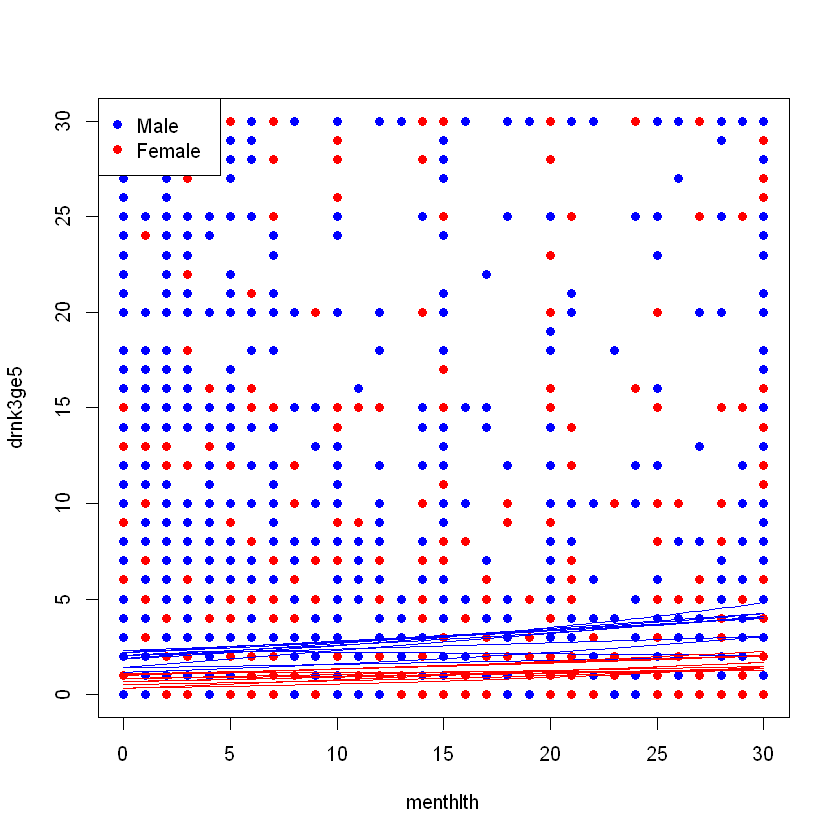

In [ ]:
# holding income level at median, color by sex
med_income2 <- levels(data_poisson$income2)[ceiling(length(levels(data_poisson$income2))/2)]
new_data <- expand.grid(income2 = med_income2,
                        menthlth = seq(from = min(data_poisson$menthlth),
                                       to = max(data_poisson$menthlth),
                                       length.out = 100),
                        marital = levels(data_poisson$marital),
                        sex = levels(data_poisson$sex))
new_data
new_data$predicted <- predict(z16, newdata = new_data, type = "response")

levels(data_poisson$marital)
plot(drnk3ge5 ~ menthlth, data=data_poisson, pch=16, col = c("blue", "red")[as.factor(data_poisson$sex)])

new_data_male <- subset(new_data, new_data$sex =="Male")
new_data_female <- subset(new_data, new_data$sex =="Female")

lines(new_data_male$menthlth, new_data_male$pred, lty=1, col="blue")
lines(new_data_female$menthlth, new_data_female$pred, lty=1, col="red")

legend("topleft", legend=c("Male", "Female"),
       col=c("blue", "red"), pch=16)

marital,menthlth,income2,sex
<fct>,<dbl>,<fct>,<fct>
Widowed,0.0000000,"Less than $10,000",Male
Widowed,0.3030303,"Less than $10,000",Male
Widowed,0.6060606,"Less than $10,000",Male
Widowed,0.9090909,"Less than $10,000",Male
Widowed,1.2121212,"Less than $10,000",Male
Widowed,1.5151515,"Less than $10,000",Male
Widowed,1.8181818,"Less than $10,000",Male
Widowed,2.1212121,"Less than $10,000",Male
Widowed,2.4242424,"Less than $10,000",Male


[1] "Less than $10,000" "Less than $15,000" "Less than $20,000"
[4] "Less than $25,000" "Less than $35,000" "Less than $50,000"
[7] "Less than $75,000" "$75,000 or more"

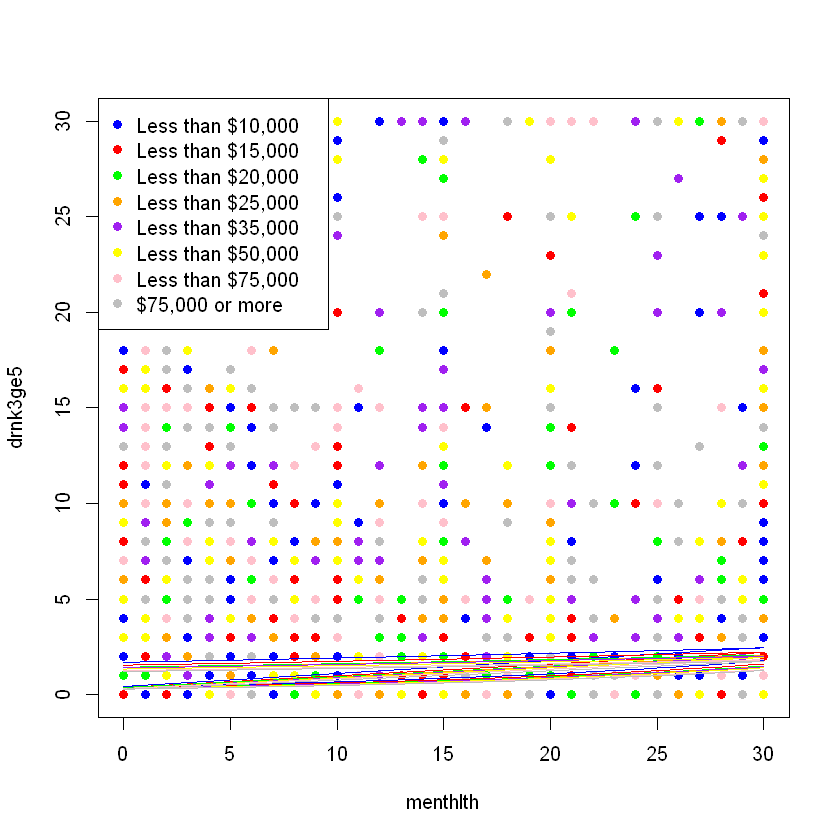

In [ ]:
# holding marital status at median, color by income
med_marital <- levels(data_poisson$marital)[ceiling(length(levels(data_poisson$marital))/2)]
new_data2 <- expand.grid(marital = med_marital,
                        menthlth = seq(from = min(data_poisson$menthlth),
                                       to = max(data_poisson$menthlth),
                                       length.out = 100),
                        income2 = levels(data_poisson$income2),
                        sex = levels(data_poisson$sex))
new_data2
new_data2$predicted <- predict(z16, newdata = new_data2, type = "response")

levels(data_poisson$income2)
plot(drnk3ge5 ~ menthlth, data=data_poisson, pch=16, col = c("blue", "red", "green", "orange", "purple","yellow", "pink","gray")[as.factor(data_poisson$income2)])

new_data_10000 <- subset(new_data2, new_data2$income2 =="Less than $10,000")
new_data_15000 <- subset(new_data2, new_data2$income2 =="Less than $15,000")
new_data_20000 <- subset(new_data2, new_data2$income2 =="Less than $20,000")
new_data_25000 <- subset(new_data2, new_data2$income2 =="Less than $25,000")
new_data_35000 <- subset(new_data2, new_data2$income2 =="Less than $35,000")
new_data_50000 <- subset(new_data2, new_data2$income2 =="Less than $50,000")
new_data_75000 <- subset(new_data2, new_data2$income2 =="Less than $75,000")
new_data_more <- subset(new_data2, new_data2$income2 =="$75,000 or more")


lines(new_data_10000$menthlth, new_data_10000$pred, lty=1, col="blue")
lines(new_data_15000$menthlth, new_data_15000$pred, lty=1, col="red")
lines(new_data_20000$menthlth, new_data_20000$pred, lty=1, col="green")
lines(new_data_25000$menthlth, new_data_25000$pred, lty=1, col="orange")
lines(new_data_35000$menthlth, new_data_35000$pred, lty=1, col="purple")
lines(new_data_50000$menthlth, new_data_50000$pred, lty=1, col="yellow")
lines(new_data_75000$menthlth, new_data_75000$pred, lty=1, col="pink")
lines(new_data_more$menthlth, new_data_more$pred, lty=1, col="gray")

legend("topleft", legend=c("Less than $10,000","Less than $15,000", "Less than $20,000", "Less than $25,000", "Less than $35,000", "Less than $50,000", "Less than $75,000", "$75,000 or more"),
       col=c("blue", "red", "green", "orange", "purple","yellow", "pink","gray"), pch=16)


sex,menthlth,income2,marital
<fct>,<dbl>,<fct>,<fct>
Male,0.0000000,"Less than $10,000",Married
Male,0.3030303,"Less than $10,000",Married
Male,0.6060606,"Less than $10,000",Married
Male,0.9090909,"Less than $10,000",Married
Male,1.2121212,"Less than $10,000",Married
Male,1.5151515,"Less than $10,000",Married
Male,1.8181818,"Less than $10,000",Married
Male,2.1212121,"Less than $10,000",Married
Male,2.4242424,"Less than $10,000",Married


[1] "Male"   "Female"

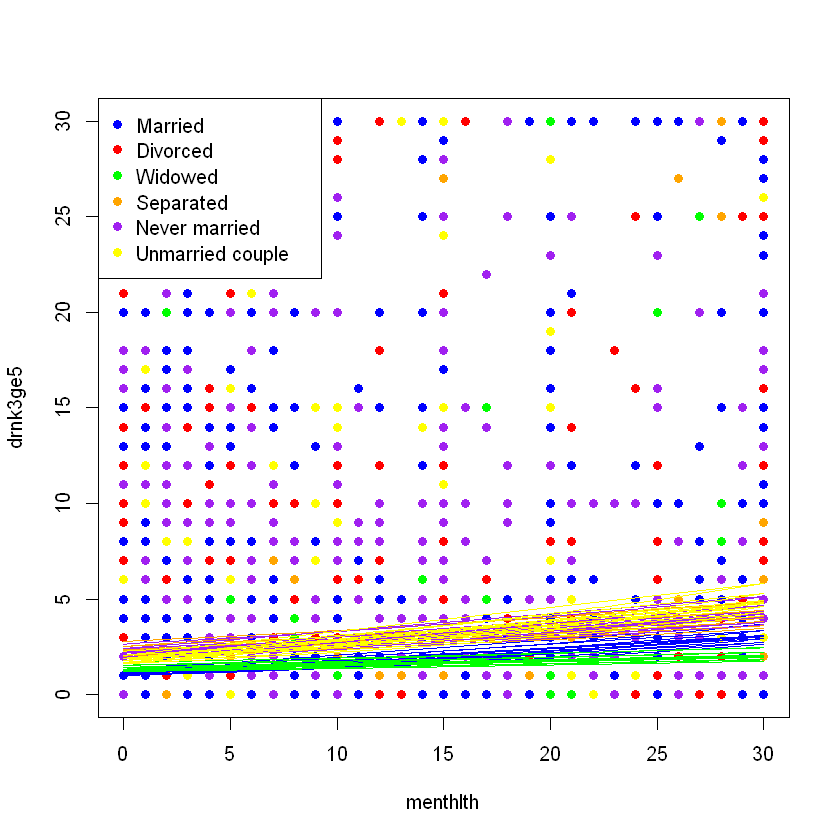

In [ ]:
# holding sex at median, color by marital
med_sex <- levels(data_poisson$sex)[ceiling(length(levels(data_poisson$sex))/2)]
new_data3 <- expand.grid(sex = med_sex,
                         menthlth = seq(from = min(data_poisson$menthlth),
                                        to = max(data_poisson$menthlth),
                                        length.out = 100),
                         income2 = levels(data_poisson$income2),
                         marital = levels(data_poisson$marital))
new_data3
new_data3$predicted <- predict(z16, newdata = new_data3, type = "response")

levels(data_poisson$sex)
plot(drnk3ge5 ~ menthlth, data=data_poisson, pch=16, col = c("blue", "red", "green", "orange", "purple","yellow")[as.factor(data_poisson$marital)])

new_data_married <- subset(new_data3, new_data3$marital =="Married")
new_data_divorced <- subset(new_data3, new_data3$marital =="Divorsed")
new_data_widowed <- subset(new_data3, new_data3$marital =="Widowed")
new_data_separated <- subset(new_data3, new_data3$marital =="Separated")
new_data_never <- subset(new_data3, new_data3$marital =="Never married")
new_data_couple <- subset(new_data3, new_data3$marital =="A member of an unmarried couple")

lines(new_data_married$menthlth, new_data_married$pred, lty=1, col="blue")
lines(new_data_divorced$menthlth, new_data_divorced$pred, lty=1, col="red")
lines(new_data_widowed$menthlth, new_data_widowed$pred, lty=1, col="green")
lines(new_data_separated$menthlth, new_data_separated$pred, lty=1, col="orange")
lines(new_data_never$menthlth, new_data_never$pred, lty=1, col="purple")
lines(new_data_couple$menthlth, new_data_couple$pred, lty=1, col="yellow")

legend("topleft", legend=c("Married", "Divorced", "Widowed", "Separated","Never married","Unmarried couple"),
       col=c("blue", "red", "green", "orange", "purple","yellow"), pch=16)


### What are the main results of your model? (2 marks)

The number of times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion always increase with the increase in mental issues. However, males generally have more drinks than females and the number of drinking times tends to be lower with increase in income.

---
## Do you have any concerns about the explanatory variables being related to each other? (0.75 marks)

Show plots and/or do analyses to support your conclusions. If there are associations between explanatory variables, what effect could this have on your model?

In [ ]:
library(car)
vif(z16)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
income2,1.298157,7,1.018814
menthlth,4.527347,1,2.127756
marital,185.472449,5,1.685885
sex,4.114678,1,2.028467
menthlth:marital,582.250314,5,1.890214
menthlth:sex,6.920375,1,2.630661
marital:sex,510.770611,5,1.865617
menthlth:marital:sex,1031.060802,5,2.001375


I have calculated the VIF for the model, the result shows that the VIF values for marital, menthlth&marital, marital&sex, and menthlth&marital&sex are high. One of the main issues with multicollinearity involving the marital variable is that it can make it more difficult to identify the unique contribution of this variable to the response variable, separate from the effects of other correlated explanatory variables in the model. This is because the marital variable is involved in several interaction terms with other variables in your model, which can make it difficult to isolate its specific effect on the response variable. For example, the interaction term menthlth:marital suggests that the effect of mental health on the response variable may depend on marital status, but it is unclear how much of this effect is due to the menthlth variable alone, the marital variable alone, or the interaction between the two. Similarly, the interaction term marital:sex suggests that the effect of marital status on the response variable may depend on gender, but it is unclear how much of this effect is due to the marital variable alone, the sex variable alone, or the interaction between the two. In addition, the high VIF value for marital suggests that there may be significant multicollinearity between this variable and other explanatory variables in your model. This can make it difficult to interpret the coefficients for all of the variables in your model, as they may be influenced by the presence of correlated variables. In particular, the high VIF value for menthlth:marital suggests that the effect of mental health on the response variable may be difficult to disentangle from the effect of marital status, since these variables are highly correlated with each other.

I have tried to remove marital status from this model (see model z19 in Appendix B), but both AIC and residual deviance/df would increased and residual deviance/df.

<div class="alert alert-block alert-success">
<a id="Discussion"></a>

# Discussion (500 words max.) (6 marks)

How well do your models achieve the goal of the analysis? (1 mark)  
What are the strengths and limitations of your models? (3 marks)  
What are some recommendations to address the limitations of your final models?  (2 marks)
    
If you include any references, please put the bibliographical information (APA style) at the end of your discussion; this does not contribute to the word count.
<div>


## Logistic model:

Based on the summary of the logistic model, the deviance residuals, coefficients, and p-values provided in the output of the logistic regression model suggest that the model fits the data reasonably well. The AIC value of 249471 is relatively small, suggesting a good model fit.

Our logistic model has several strengths. Firstly, we have included most of the relevant explanatory variables in the model, encompassing both categorical and quantitative factors. Secondly, by comparing different models, we have selected the final model without interaction. This has simplified the model and made it more interpretable. Lastly, we have minimized AIC and deviance/df by testing different models, ensuring that our model is better-fitting.

One limitation of this model is that it only includes four explanatory variables, which may not capture all the factors that could influence alcohol consumption. It's possible that other variables, such as age, gender, or ethnicity, could be important predictors of alcohol consumption. To improve the logistic model, we could include additional explanatory variables that are known to be associated with alcohol consumption.

## Poisson model:
Since the response variable does not follow a poisson distribution, AIC and deviance/df are relatively large for our best model. It indicates that the model may not be able to accurately represent the underlying data generating processand and the variability of the response variable is greater than what would be expected from a Poisson distribution.

The strength of our model is that we have included most of the relevant factors and both categorical and quantitative factors are included, and under these conditions for building poisson model, we have minimized AIC and deviance/df aftering trying different models. Although there are some collinearities casue by the factor "Marital", we have addressed this issue through creating interaction term.

There are two limitation about this model. First, the response variable does not follow a poisson distribution, so using poisson regression model may not be able to accurately fit the data and make prediction. Secondly, the alcohol consumption may not merely related to these eight factors. Therefore, more data might need to be collected such as age, religion, job status, and drinking history, and since we are only able to include four factors in the model, it would somehow limit the descriptive and predictive power of the model.

To improve the model, first, we should be able to use other type of models such as multiple regression models. Then, if possible, include more factors that could affect alcohol consumption such as age, religion, job status, and drinking history. Finally, include more explanatory variables in the model so that it can take more factors into consideration and predict more accurately.

## Reference
[1] Scott, K. M., Wells, J. E., Angermeyer, M., Brugha, T. S., Bromet, E., Demyttenaere, K., de Girolamo, G., Gureje, O., Haro, J. M., Jin, R., Karam, A. N., Kovess, V., Lara, C., Levinson, D., Ormel, J., Posada-Villa, J., Sampson, N., Takeshima, T., Zhang, M., & Kessler, R. C. (2010). Gender and the relationship between marital status and first onset of mood, anxiety and substance use disorders. Psychological medicine, 40(9), 1495–1505. https://doi.org/10.1017/S0033291709991942

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# Building the Logistic Regression Model (1 mark)
</div>

### Compare the AIC values for the models that you tried.

In [ ]:
glm.1 <- glm(alcday5_new ~ physhlth + menthlth + as.factor(marital) + as.factor(sex), data=mydata, family="binomial"(link="logit"))
print(paste("glm.1", AIC(glm.1), sep = ": "))

glm.2 <- glm(alcday5_new ~ physhlth + menthlth + as.factor(marital) + as.factor(income2), data=mydata, family="binomial"(link="logit"))
print(paste("glm.2", AIC(glm.2), sep = ": "))

glm.3 <- glm(alcday5_new ~ physhlth + menthlth + as.factor(marital) + as.factor(educa), data=mydata, family="binomial"(link="logit"))
print(paste("glm.3", AIC(glm.3), sep = ": "))

glm.4 <- glm(alcday5_new ~ physhlth + menthlth + as.factor(educa) + as.factor(income2), data=mydata, family="binomial"(link="logit"))
print(paste("glm.4", AIC(glm.4), sep = ": "))

glm.5 <- glm(alcday5_new ~ physhlth + menthlth + as.factor(educa) + as.factor(sex), data=mydata, family="binomial"(link="logit"))
print(paste("glm.5", AIC(glm.5), sep = ": "))

glm.6 <- glm(alcday5_new ~ physhlth + menthlth + as.factor(sex) + as.factor(income2), data=mydata, family="binomial"(link="logit"))
print(paste("glm.6", AIC(glm.6), sep = ": "))

glm.7 <- glm(alcday5_new ~  poorhlth + as.factor(marital) + as.factor(sex) + as.factor(income2), data=mydata, family="binomial"(link="logit"))
print(paste("glm.7", AIC(glm.7), sep = ": "))

glm.8 <- glm(alcday5_new ~  poorhlth + as.factor(marital) + as.factor(sex) + as.factor(educa), data=mydata, family="binomial"(link="logit"))
print(paste("glm.8", AIC(glm.8), sep = ": "))

glm.9 <- glm(alcday5_new ~  poorhlth + as.factor(marital) + as.factor(income2) + as.factor(educa), data=mydata, family="binomial"(link="logit"))
print(paste("glm.9", AIC(glm.9), sep = ": "))

glm.10 <- glm(alcday5_new ~  poorhlth + as.factor(sex) + as.factor(income2) + as.factor(educa), data=mydata, family="binomial"(link="logit"))
print(paste("glm.10", AIC(glm.10), sep = ": "))

glm.11 <- glm(alcday5_new ~ physhlth + menthlth + sleptim1 + as.factor(marital), data=mydata, family="binomial"(link="logit"))
print(paste("glm.11", AIC(glm.11), sep = ": "))

glm.12 <- glm(alcday5_new ~ physhlth + menthlth + sleptim1 + as.factor(sex), data=mydata, family="binomial"(link="logit"))
print(paste("glm.12", AIC(glm.12), sep = ": "))

glm.13 <- glm(alcday5_new ~  poorhlth + as.factor(marital) + as.factor(sex), data=mydata, family="binomial"(link="logit"))
print(paste("glm.13", AIC(glm.13), sep = ": "))

glm.14 <- glm(alcday5_new ~  poorhlth + as.factor(marital) + as.factor(educa), data=mydata, family="binomial"(link="logit"))
print(paste("glm.14", AIC(glm.14), sep = ": "))

glm.15 <- glm(alcday5_new ~  poorhlth + as.factor(income2) + as.factor(educa), data=mydata, family="binomial"(link="logit"))
print(paste("glm.15", AIC(glm.15), sep = ": "))

glm.16 <- glm(alcday5_new ~  poorhlth + as.factor(sex) + as.factor(income2), data=mydata, family="binomial"(link="logit"))
print(paste("glm.16", AIC(glm.16), sep = ": "))

[1] "glm.1: 258104.415869931"
[1] "glm.2: 249557.26348346"
[1] "glm.3: 254107.652696011"
[1] "glm.4: 250275.468938442"
[1] "glm.5: 252848.644004099"
[1] "glm.6: 249946.375035263"
[1] "glm.7: 249500.970259509"
[1] "glm.8: 253658.421721778"
[1] "glm.9: 249470.723179422"
[1] "glm.10: 249741.48965338"
[1] "glm.11: 260353.758928324"
[1] "glm.12: 260097.816719959"
[1] "glm.13: 261228.998365262"
[1] "glm.14: 256116.624519371"
[1] "glm.15: 252254.679973586"
[1] "glm.16: 252363.966780025"


Model glm.9 (the model we chose) has the lowest AIC and the variables chosen in the model are interpretable. Therefore, glm.9 is chosen as our final logistic model.

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# Building the Poisson Regression Model (1 mark)
</div>

### Compare the AIC values for the models that you tried.

In [ ]:
#all quantitative model
data_poisson
z12 <- glm(drnk3ge5 ~ physhlth+menthlth+poorhlth+sleptim1, data=data_poisson, family="poisson"(link="log"))
summary(z12)

# all categorical model
z13 <- glm(drnk3ge5 ~ menthlth+sleptim1+sex+marital, data=data_poisson, family="poisson"(link="log"))
summary(z13)

# mental, income, sex, marital
z14 <- glm(drnk3ge5 ~ menthlth+income2+sex+marital, data=data_poisson, family="poisson"(link="log"))
summary(z14)

#mental marital sex interaction
z15 <- glm(drnk3ge5 ~ menthlth*marital*sex, data=data_poisson, family="poisson"(link="log"))
summary(z15)

#income, mental marital sex interaction #The model we use
z16 <- glm(drnk3ge5 ~ income2 + menthlth*marital*sex, data=data_poisson, family="poisson"(link="log"))
summary(z16)

#marital, mental income sex interaction
z17 <- glm(drnk3ge5 ~ marital + menthlth*income2*sex, data=data_poisson, family="poisson"(link="log"))
summary(z17)

#mental, income sex interaction
z18 <- glm(drnk3ge5 ~ menthlth + income2*sex, data=data_poisson, family="poisson"(link="log"))
summary(z18)

# income, mental sex interaction
z19 <- glm(drnk3ge5 ~ income2 + menthlth*sex, data=data_poisson, family="poisson"(link="log"))
summary(z19)

,physhlth,menthlth,poorhlth,sleptim1,marital,educa,income2,sex,alcday5,drnk3ge5,alcday5_new
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
1,3,2,0,9,Married,College 4 years or more (College graduate),"$75,000 or more",Female,220,20,1
2,2,0,0,8,Married,Grade 12 or GED (High school graduate),"Less than $75,000",Female,208,0,1
3,10,2,0,6,Married,College 4 years or more (College graduate),"Less than $50,000",Male,210,0,1
4,5,0,10,6,Widowed,College 1 year to 3 years (Some college or technical school),"Less than $50,000",Female,202,0,1
5,0,1,0,6,Married,College 4 years or more (College graduate),"$75,000 or more",Male,205,0,1
8,3,3,0,6,Married,Grade 12 or GED (High school graduate),"$75,000 or more",Female,201,0,1
10,3,2,0,6,Married,College 1 year to 3 years (Some college or technical school),"Less than $75,000",Male,230,0,1
16,4,0,0,7,Married,College 1 year to 3 years (Some college or technical school),"Less than $25,000",Male,203,0,1
17,0,5,0,8,Married,College 4 years or more (College graduate),"$75,000 or more",Female,203,0,1



Call:
glm(formula = drnk3ge5 ~ physhlth + menthlth + poorhlth + sleptim1, 
    family = poisson(link = "log"), data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5792  -1.4936  -1.4126  -0.1877  12.9360  

Coefficients:
              Estimate Std. Error z value             Pr(>|z|)    
(Intercept)  0.2186689  0.0144357   15.15 < 0.0000000000000002 ***
physhlth    -0.0020399  0.0003617   -5.64          0.000000017 ***
menthlth     0.0277162  0.0002832   97.86 < 0.0000000000000002 ***
poorhlth     0.0073596  0.0004194   17.55 < 0.0000000000000002 ***
sleptim1    -0.0345463  0.0019814  -17.43 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 454219  on 99808  degrees of freedom
Residual deviance: 441871  on 99804  degrees of freedom
AIC: 522539

Number of Fisher Scoring iterations: 7



Call:
glm(formula = drnk3ge5 ~ menthlth + sleptim1 + sex + marital, 
    family = poisson(link = "log"), data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2576  -1.5005  -1.1020  -0.5646  13.8875  

Coefficients:
                                         Estimate Std. Error  z value
(Intercept)                             0.2051470  0.0145149   14.133
menthlth                                0.0282032  0.0002681  105.187
sleptim1                               -0.0144531  0.0019277   -7.498
sexFemale                              -0.8284557  0.0059845 -138.434
maritalDivorced                         0.4728952  0.0081144   58.279
maritalWidowed                         -0.0408526  0.0137405   -2.973
maritalSeparated                        0.5121128  0.0160072   31.993
maritalNever married                    0.6464812  0.0070879   91.209
maritalA member of an unmarried couple  0.5838272  0.0128321   45.498
                                            


Call:
glm(formula = drnk3ge5 ~ menthlth + income2 + sex + marital, 
    family = poisson(link = "log"), data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4114  -1.5099  -1.1051  -0.5455  13.8355  

Coefficients:
                                         Estimate Std. Error  z value
(Intercept)                             0.3841172  0.0124022   30.972
menthlth                                0.0268389  0.0002713   98.910
income2Less than $15,000               -0.0898734  0.0147738   -6.083
income2Less than $20,000               -0.1549800  0.0140689  -11.016
income2Less than $25,000               -0.1795810  0.0136070  -13.198
income2Less than $35,000               -0.1808369  0.0132541  -13.644
income2Less than $50,000               -0.2181378  0.0127378  -17.125
income2Less than $75,000               -0.2847596  0.0128275  -22.199
income2$75,000 or more                 -0.3270554  0.0122681  -26.659
sexFemale                              -0.830


Call:
glm(formula = drnk3ge5 ~ menthlth * marital * sex, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1062  -1.5033  -1.0977  -0.5637  14.4961  

Coefficients:
                                                              Estimate
(Intercept)                                                0.055249675
menthlth                                                   0.033490177
maritalDivorced                                            0.636422443
maritalWidowed                                             0.249765161
maritalSeparated                                           0.757926386
maritalNever married                                       0.702601284
maritalA member of an unmarried couple                     0.524328768
sexFemale                                                 -0.791399898
menthlth:maritalDivorced                                  -0.008875775
menthlth:maritalWidowed                      


Call:
glm(formula = drnk3ge5 ~ income2 + menthlth * marital * sex, 
    family = poisson(link = "log"), data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4084  -1.5177  -1.1039  -0.5687  14.4073  

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                                0.3425781  0.0130672
income2Less than $15,000                                  -0.0955686  0.0147825
income2Less than $20,000                                  -0.1667315  0.0140859
income2Less than $25,000                                  -0.1900993  0.0136332
income2Less than $35,000                                  -0.1931621  0.0132799
income2Less than $50,000                                  -0.2333981  0.0127689
income2Less than $75,000                                  -0.2978831  0.0128394
income2$75,000 or more                                    -0.3370834  0.0122617
menthlth                 


Call:
glm(formula = drnk3ge5 ~ marital + menthlth * income2 * sex, 
    family = poisson(link = "log"), data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1899  -1.5187  -1.1161  -0.5486  13.8807  

Coefficients:
                                             Estimate Std. Error z value
(Intercept)                                  0.402499   0.020157  19.968
maritalDivorced                              0.400930   0.008551  46.885
maritalWidowed                              -0.108161   0.014060  -7.693
maritalSeparated                             0.428763   0.016287  26.325
maritalNever married                         0.569295   0.007588  75.022
maritalA member of an unmarried couple       0.529776   0.012984  40.803
menthlth                                     0.021066   0.001069  19.714
income2Less than $15,000                    -0.027524   0.027413  -1.004
income2Less than $20,000                    -0.093104   0.025240  -3.689
income2Less tha


Call:
glm(formula = drnk3ge5 ~ menthlth + income2 * sex, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1019  -1.6100  -1.1463  -0.4375  13.5666  

Coefficients:
                                     Estimate Std. Error z value
(Intercept)                         0.7430232  0.0136231  54.542
menthlth                            0.0275955  0.0002689 102.639
income2Less than $15,000           -0.0902944  0.0190475  -4.740
income2Less than $20,000           -0.1338590  0.0178594  -7.495
income2Less than $25,000           -0.1918329  0.0173102 -11.082
income2Less than $35,000           -0.2302137  0.0168359 -13.674
income2Less than $50,000           -0.3379760  0.0161609 -20.913
income2Less than $75,000           -0.4452959  0.0161573 -27.560
income2$75,000 or more             -0.5574006  0.0150143 -37.125
sexFemale                          -0.7016904  0.0201557 -34.813
income2Less than $15,000:sexFemale -0.10


Call:
glm(formula = drnk3ge5 ~ income2 + menthlth * sex, family = poisson(link = "log"), 
    data = data_poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1671  -1.6072  -1.1625  -0.4595  13.6365  

Coefficients:
                           Estimate Std. Error  z value             Pr(>|z|)
(Intercept)               0.8137710  0.0110325   73.761 < 0.0000000000000002
income2Less than $15,000 -0.1331768  0.0147613   -9.022 < 0.0000000000000002
income2Less than $20,000 -0.2304104  0.0140422  -16.408 < 0.0000000000000002
income2Less than $25,000 -0.2946971  0.0135484  -21.751 < 0.0000000000000002
income2Less than $35,000 -0.3220038  0.0131679  -24.454 < 0.0000000000000002
income2Less than $50,000 -0.3961244  0.0125723  -31.508 < 0.0000000000000002
income2Less than $75,000 -0.4995200  0.0125570  -39.780 < 0.0000000000000002
income2$75,000 or more   -0.6111170  0.0116769  -52.335 < 0.0000000000000002
menthlth                  0.0266239  0.0003343   79.643 < 0.00

Model z16 (the model we chose) has the lowest AIC, models including more explanatory variables and interaction term tend to have lower AIC.